Now requires JHU_Each_State_Capture_and_Serialize_JHU_Latest_Data to be run first.  Once ran a serialized version of the latest JHU data will be available locally thus avoiding multiple data fetches for the various related routines

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date, timedelta
import datetime
import matplotlib.dates as mdates
%matplotlib inline

Update end date below to the previous day's date

In [2]:
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%m/%d/%Y')

'01/11/2022'

In [3]:
!ls -alt *.pkl

-rw-r--r-- 1 ldhagen ldhagen   6236153 Jan 12 14:03 11_Jan_2022_JHU_data.pkl
-rw-r--r-- 1 ldhagen ldhagen 327129502 Jan 12 08:42 11_Jan_2022_JHU_total_data.pkl
-rw-r--r-- 1 ldhagen ldhagen   6226411 Jan 11 17:00 10_Jan_2022_JHU_data.pkl
-rw-r--r-- 1 ldhagen ldhagen 326613234 Jan 11 11:28 10_Jan_2022_JHU_total_data.pkl
-rw-r--r-- 1 ldhagen ldhagen 326096949 Jan 10 12:14 09_Jan_2022_JHU_total_data.pkl
-rw-r--r-- 1 ldhagen ldhagen 325580664 Jan  9 16:23 08_Jan_2022_JHU_total_data.pkl
-rw-r--r-- 1 ldhagen ldhagen 325064379 Jan  8 16:40 07_Jan_2022_JHU_total_data.pkl
-rw-r--r-- 1 ldhagen ldhagen   6197193 Jan  8 15:26 07_Jan_2022_JHU_data.pkl
-rw-r--r-- 1 ldhagen ldhagen   6187468 Jan  7 14:53 06_Jan_2022_JHU_data.pkl
-rw-r--r-- 1 ldhagen ldhagen 324548094 Jan  7 09:34 06_Jan_2022_JHU_total_data.pkl
-rw-r--r-- 1 ldhagen ldhagen   6177726 Jan  6 14:38 05_Jan_2022_JHU_data.pkl
-rw-r--r-- 1 ldhagen ldhagen 324031809 Jan  6 12:23 05_Jan_2022_JHU_total_data.pkl
-rw-r--r-- 1 ldhagen ldhagen   616

In [4]:
df_jhu_us_dict = pd.read_pickle(yesterday.strftime('%d_%b_%Y') + r'_JHU_data.pkl')

In [5]:
x = pd.date_range(start='4/12/2020', end=yesterday)
#x = pd.date_range(start='7/12/2021', end='9/08/2021')

In [6]:
date_list = []
for date_value in x.strftime('%m-%d-%Y'):
    date_list.append(date_value)
dt_date_list = pd.to_datetime(pd.Series(date_list))

In [7]:
list(df_jhu_us_dict.keys())[0]

'04-12-2020'

In [8]:
State_list =list(df_jhu_us_dict[list(df_jhu_us_dict.keys())[0]].Province_State)

In [9]:
State_list.remove('Recovered')
State_list.remove('Diamond Princess')
State_list.remove('Grand Princess')

In [10]:
State_list

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Guam',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming',
 'American Samoa',
 'Northern Mariana Islands',
 'Virgin Islands']

In [11]:
def process_state_confirmed(passed_state):
    print(passed_state)
    aaa = df_jhu_us_dict[date_list[0]].loc[df_jhu_us_dict[date_list[0]].Province_State == passed_state]
#    print(aaa)
    for d_value in date_list[1:]:
        aaa = aaa.append(df_jhu_us_dict[d_value].loc[df_jhu_us_dict[d_value].Province_State == passed_state])
#    return(xxx)
    bbb = aaa.loc[:,['dt_date','Confirmed']]
    ccc = bbb.set_index('dt_date')
    ddd = ccc.diff(periods = 1)
    ddd_7day_moving = ddd.rolling(7).mean().shift()
    return(ddd,passed_state,ddd_7day_moving)

In [45]:
def chart_daily_confirmed(passed_df, passed_state_name, ddd_7day_moving):
    months = mdates.MonthLocator()
    days = mdates.DayLocator()
    timeFmt = mdates.DateFormatter('%b %Y')
    fig, ax = plt.subplots()
    fig.set_size_inches(48,20)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
    plt.title('Johns Hopkins University ***' + passed_state_name + '*** Daily COVID Cases')
    plt.xlabel('Date',color='black')
    plt.ylabel('New COVID Cases',color='black')
    plt.bar(passed_df.index,passed_df.Confirmed)
    plt.plot(ddd_7day_moving,'ro-')
    plt.legend(['7 Day Rolling Average','New Confirmed Cases'])
    fig.savefig('JHUDaily '+ passed_state_name + ' New.png')
plt.close()

Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
District of Columbia
Florida
Georgia
Guam
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine


<ipython-input-12-322492f600db>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Puerto Rico
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming
American Samoa
Northern Mariana Islands
Virgin Islands


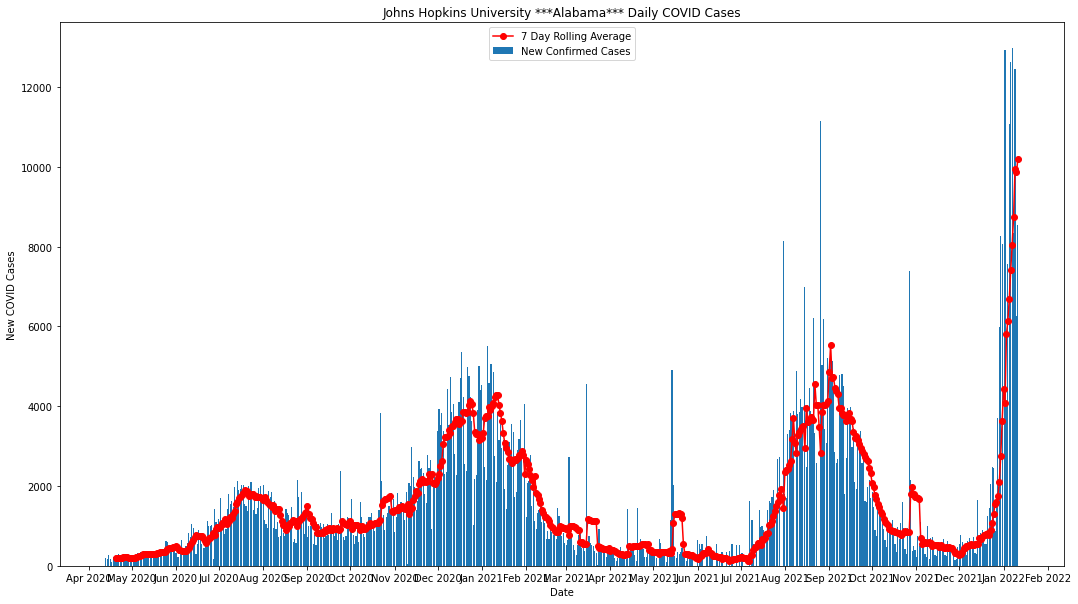

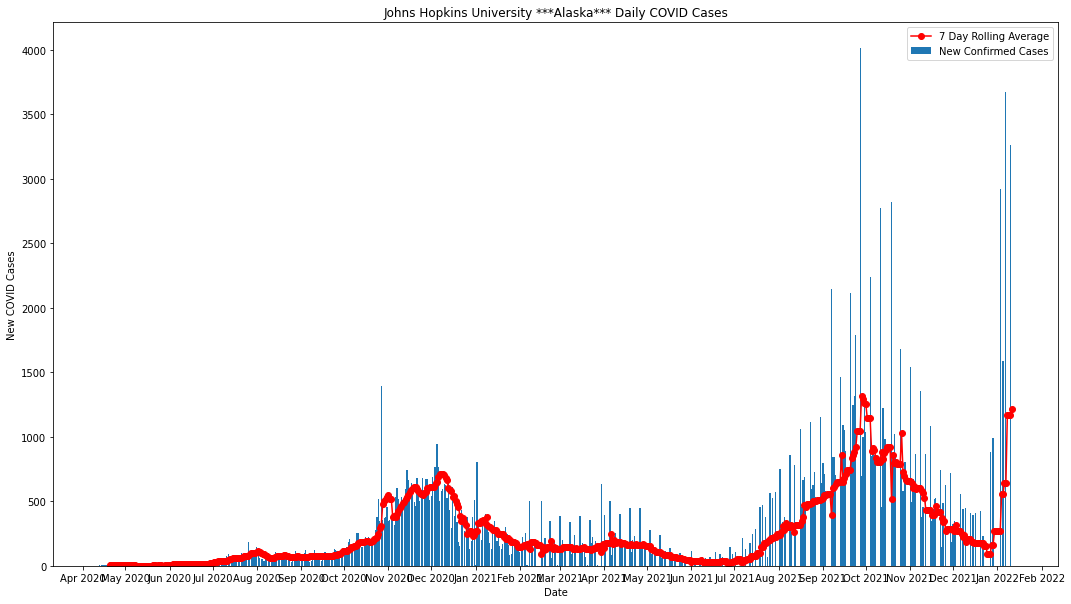

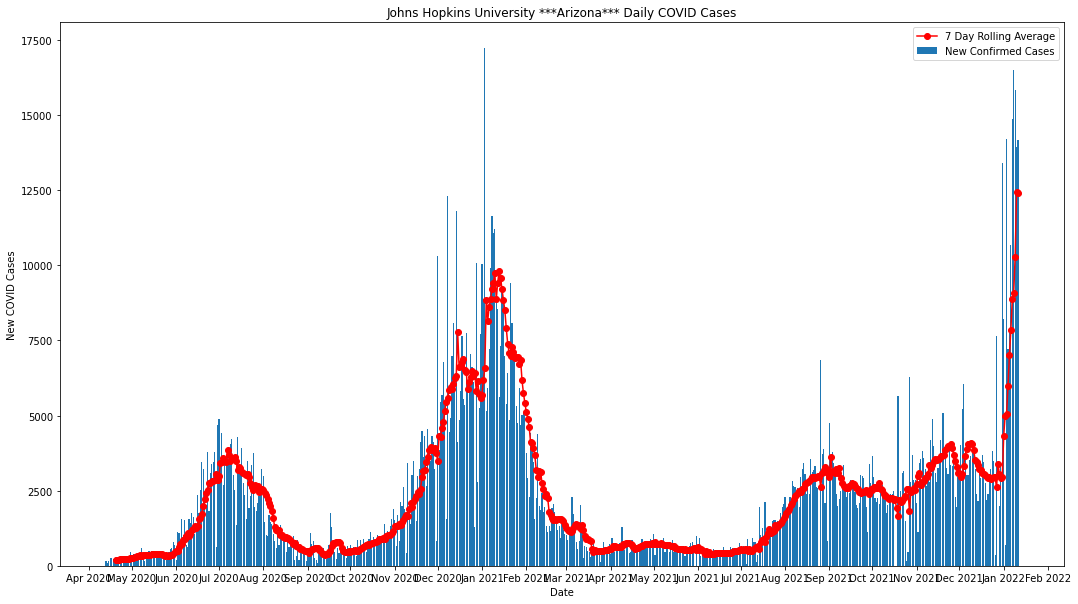

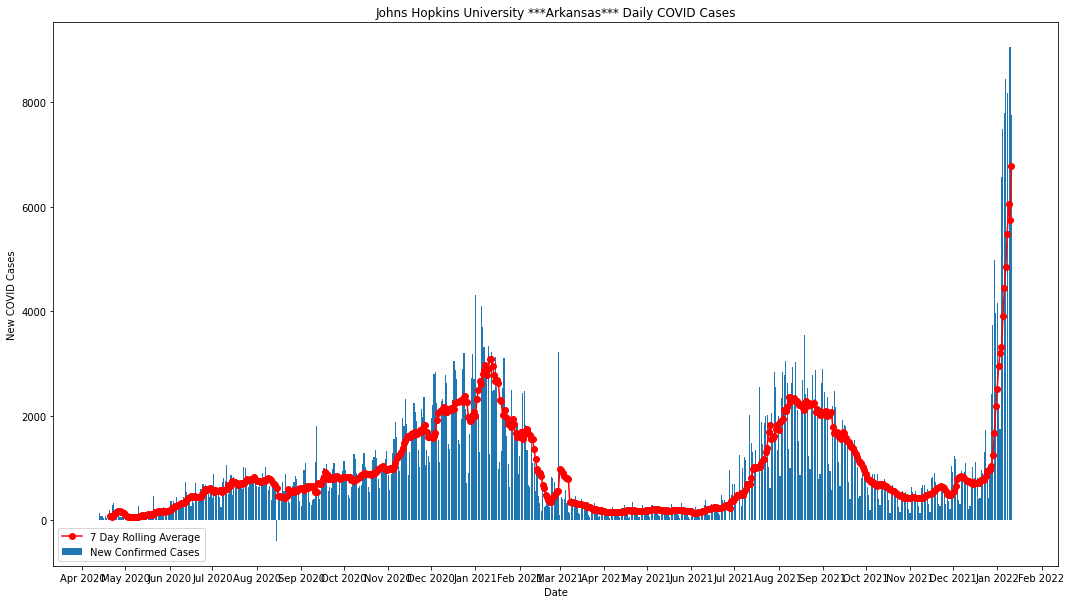

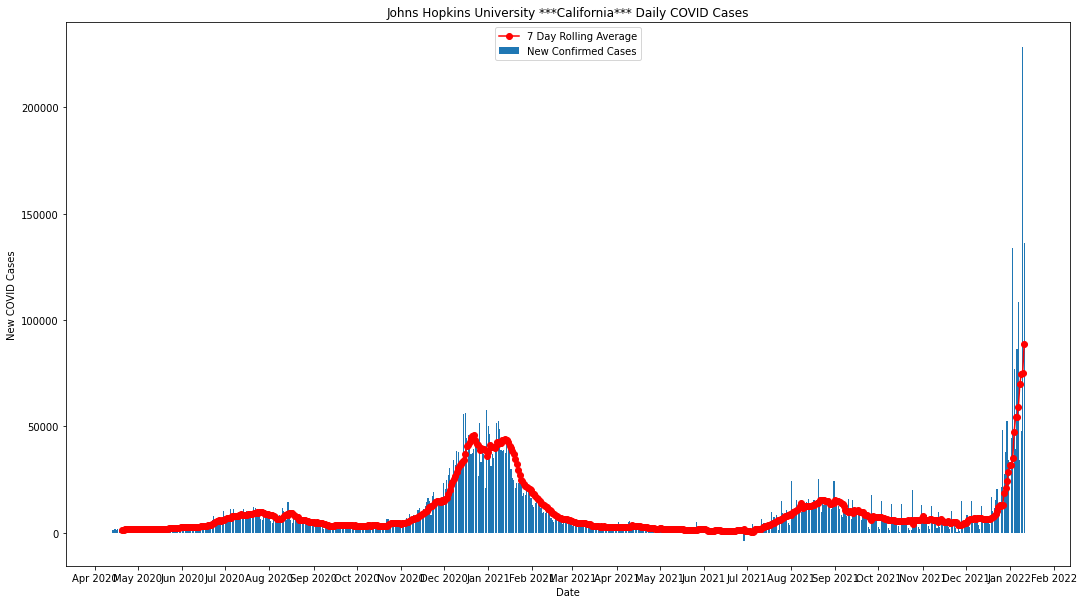

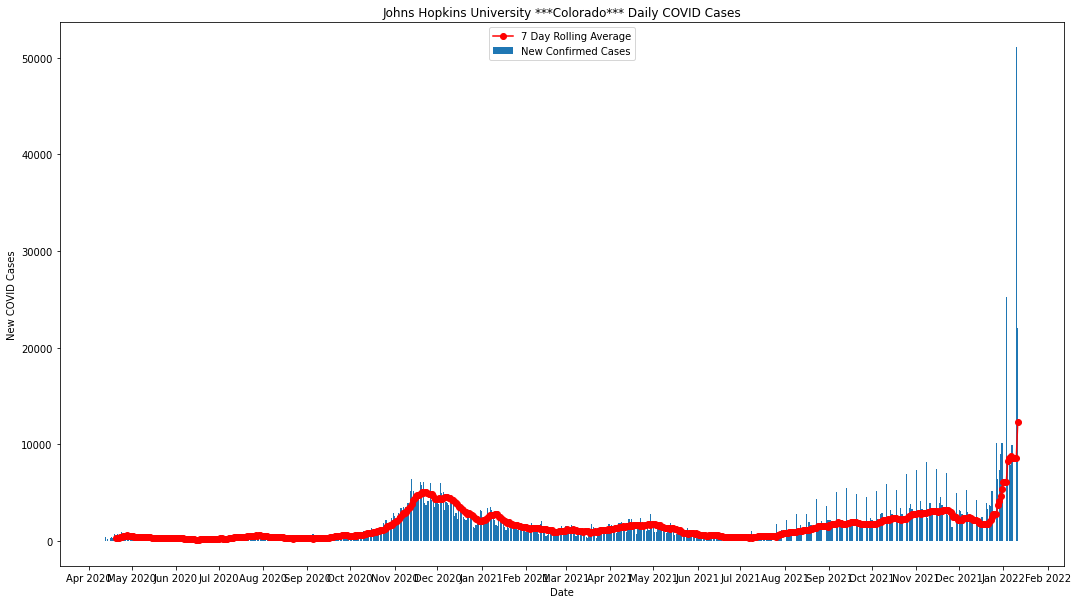

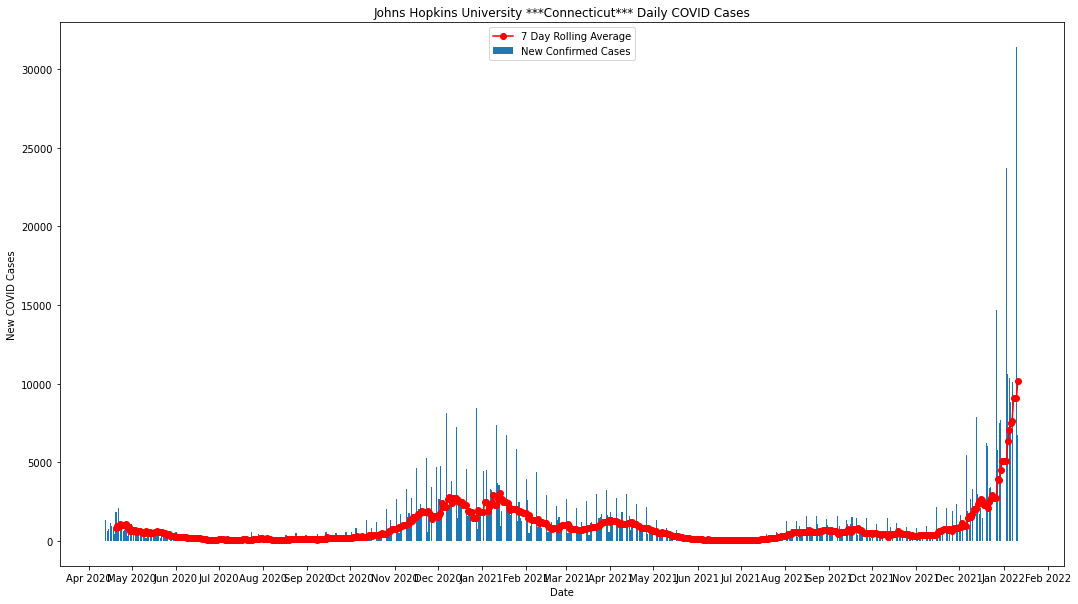

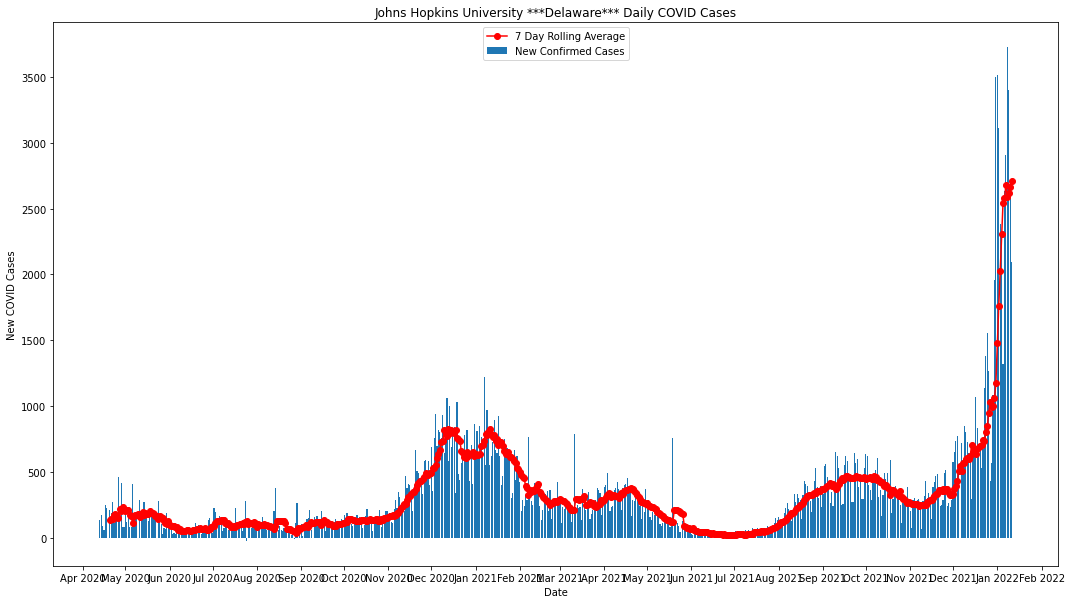

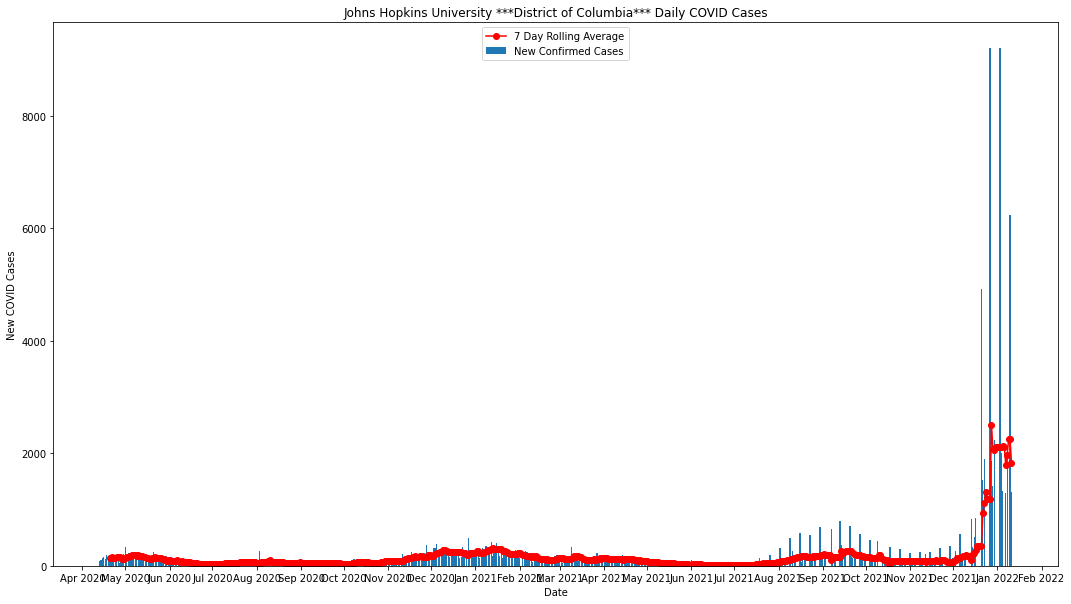

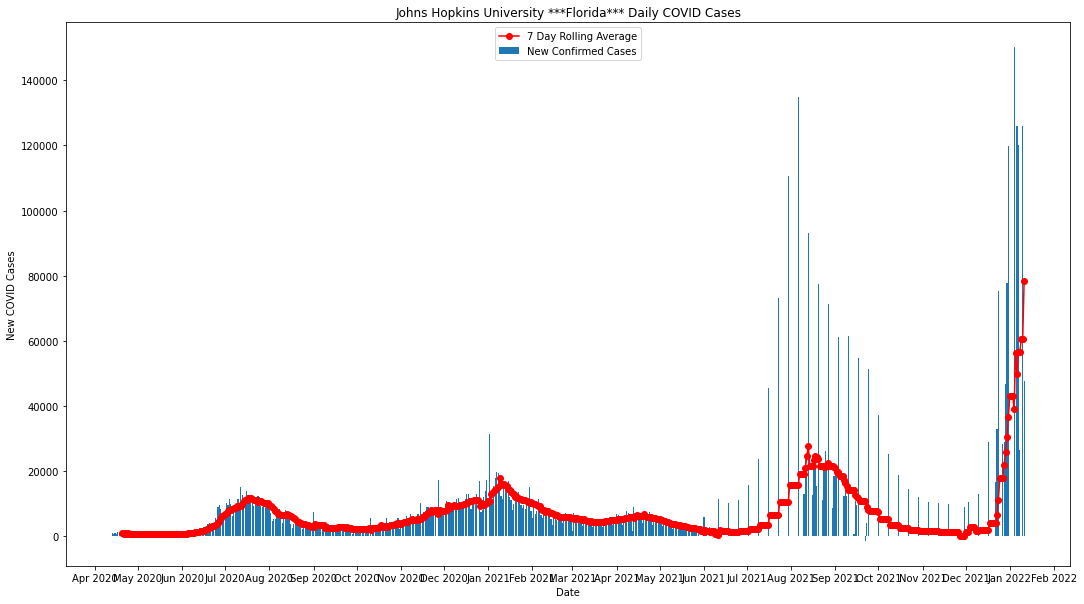

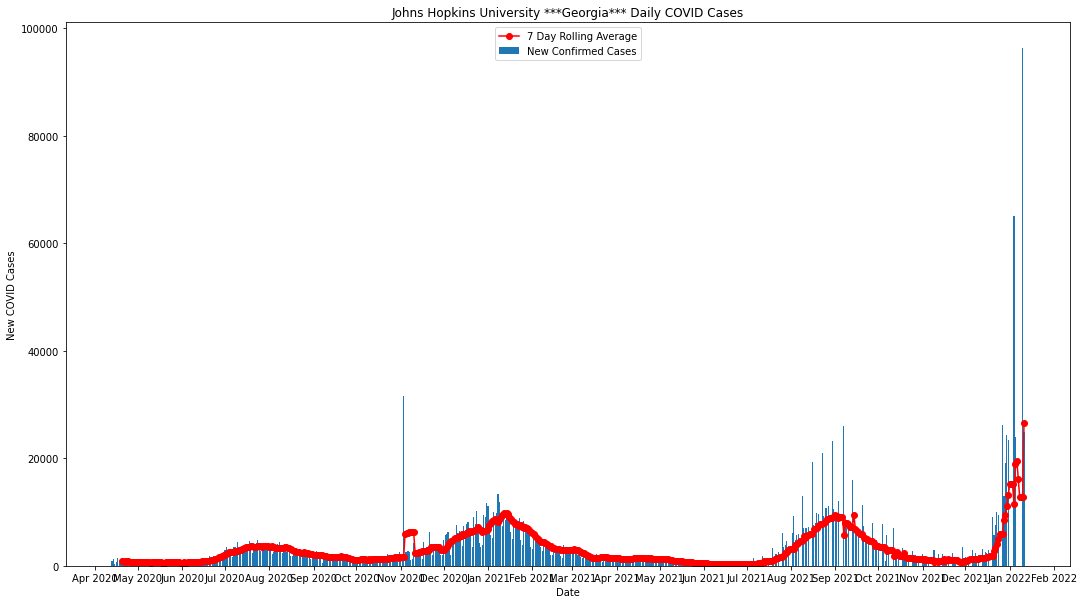

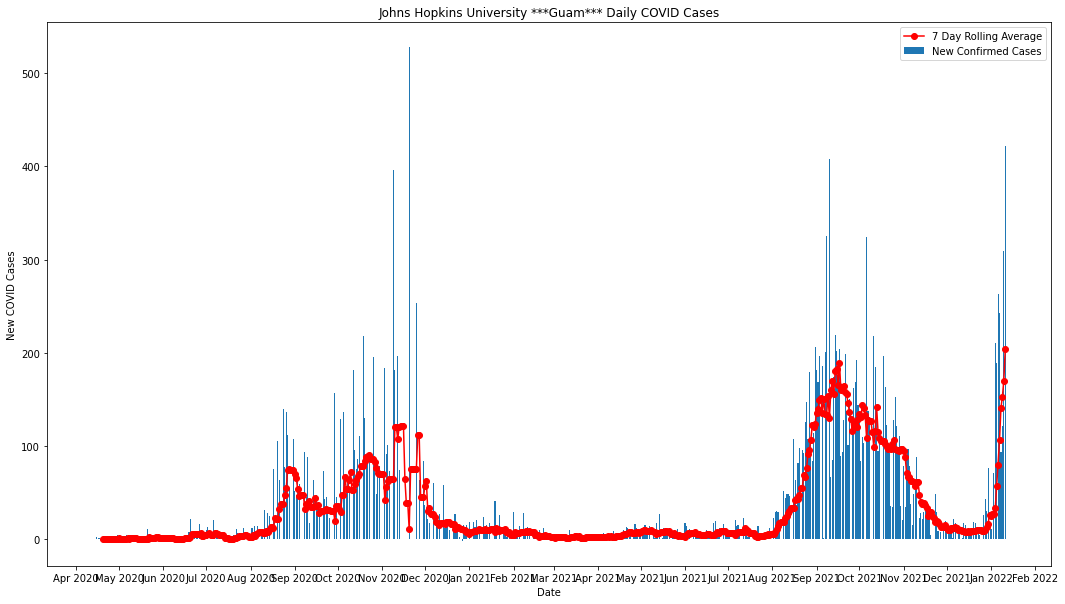

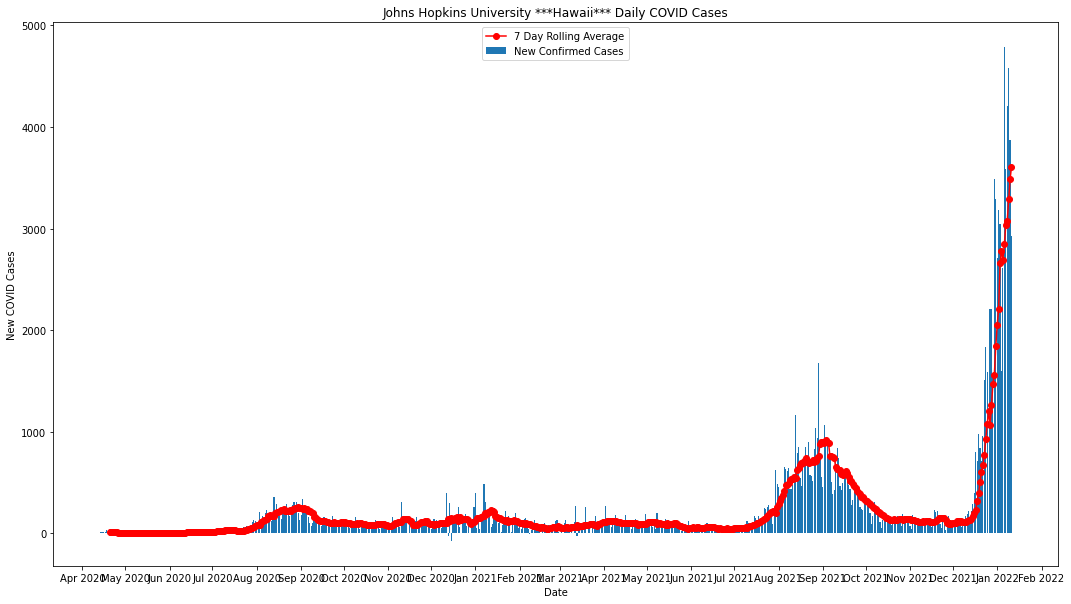

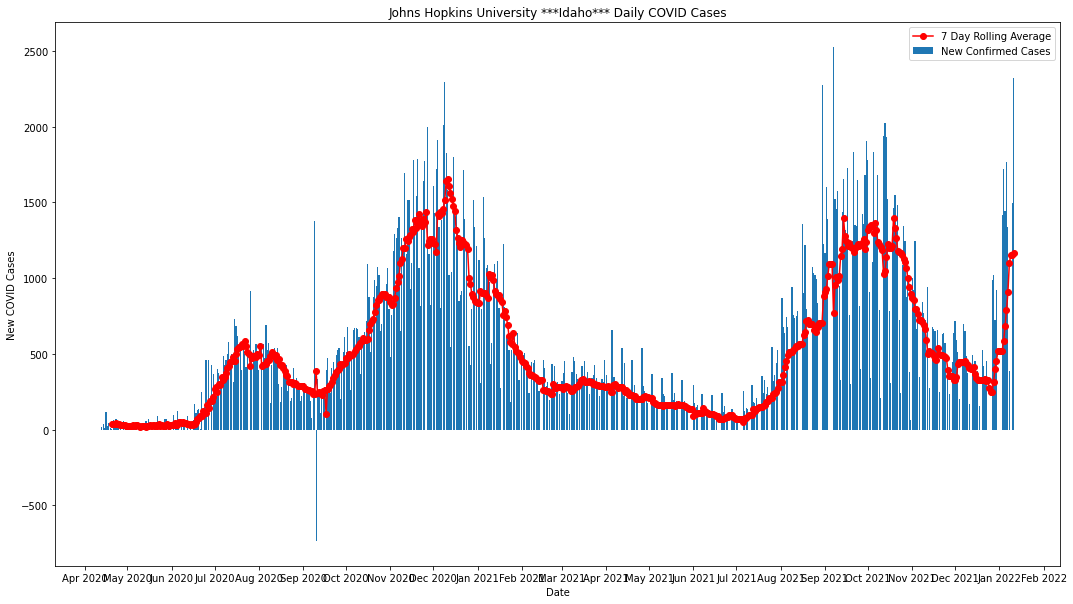

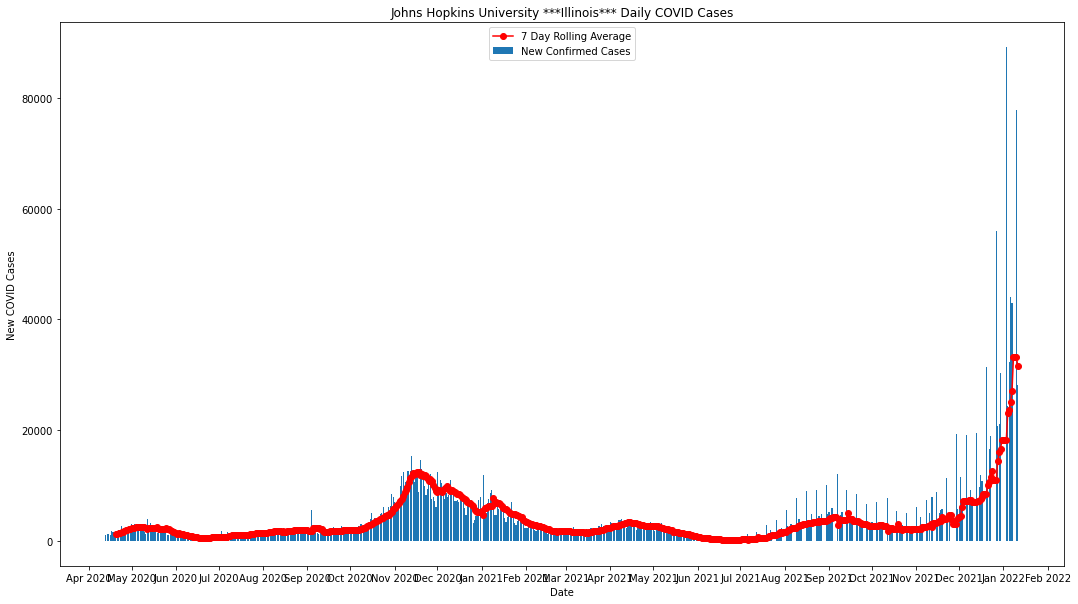

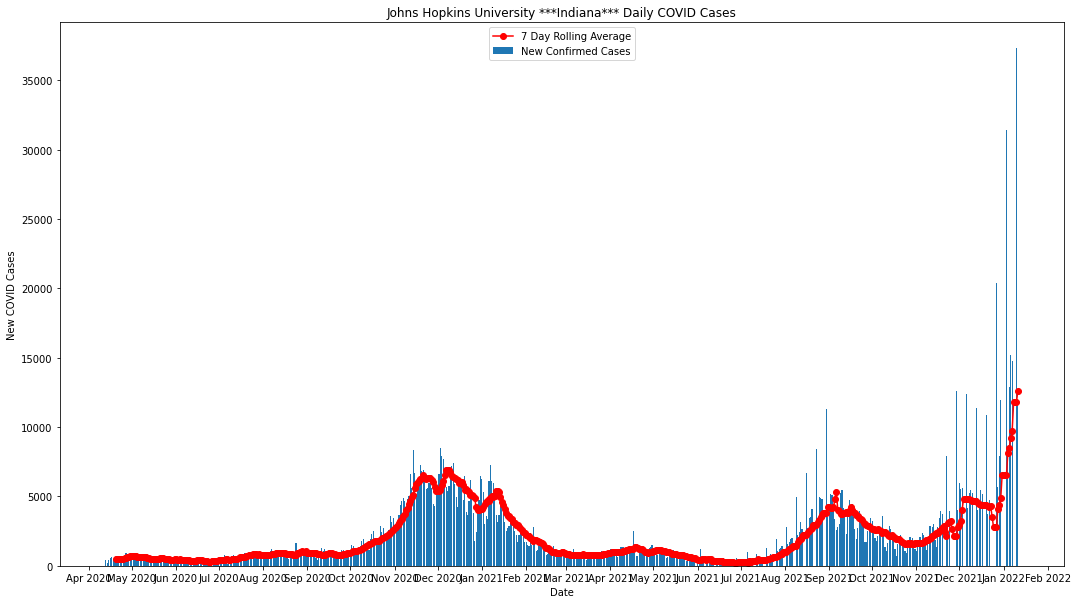

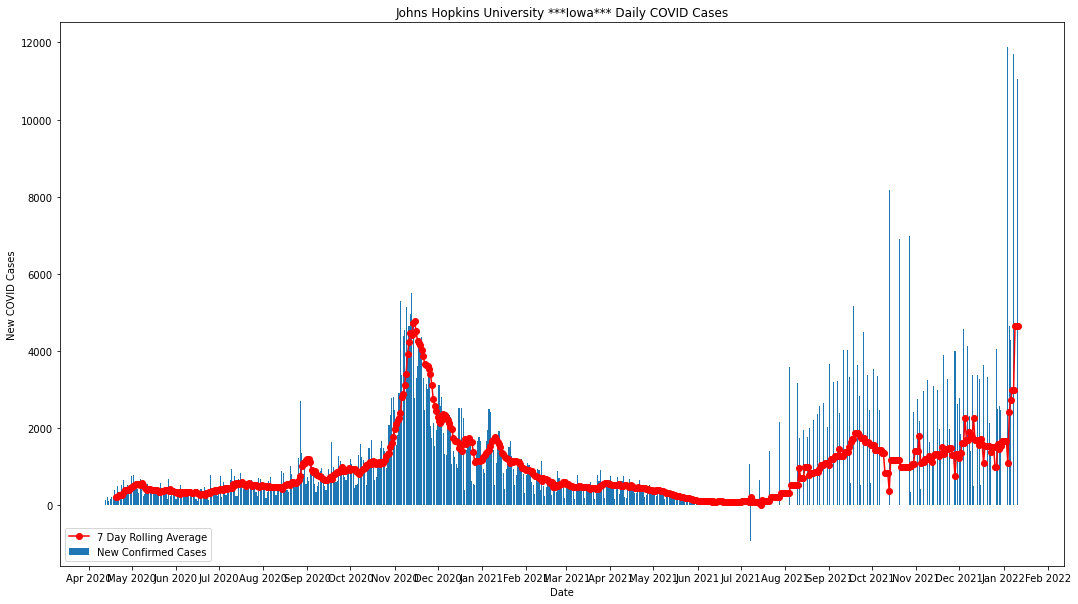

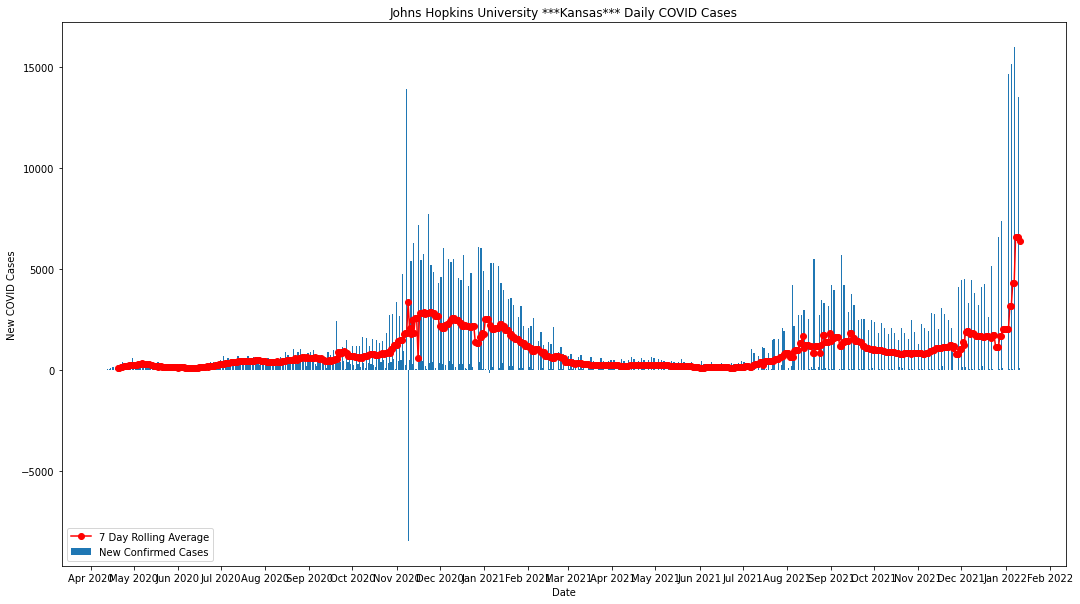

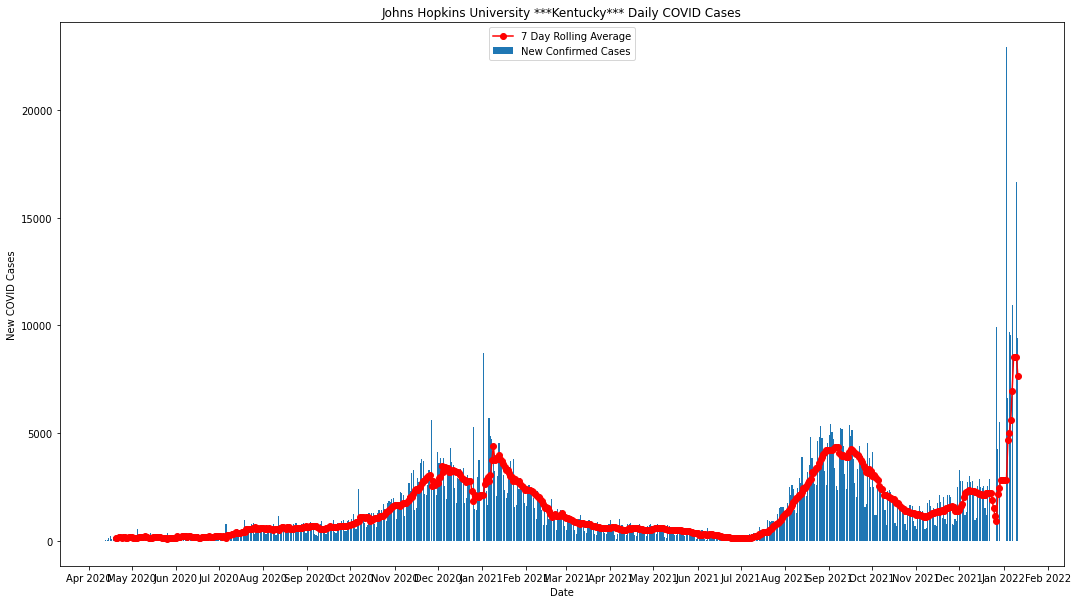

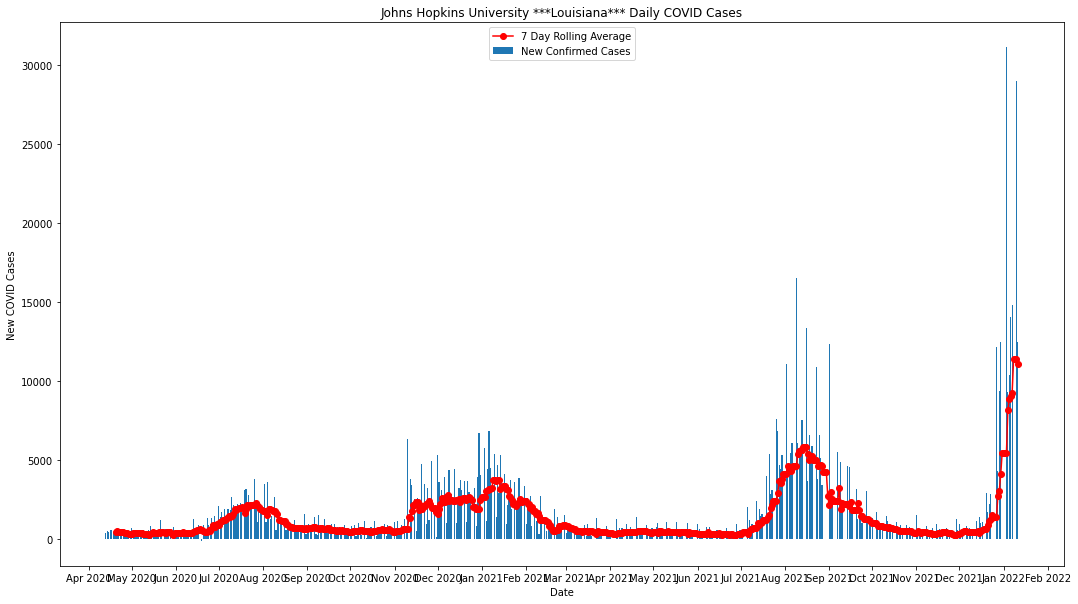

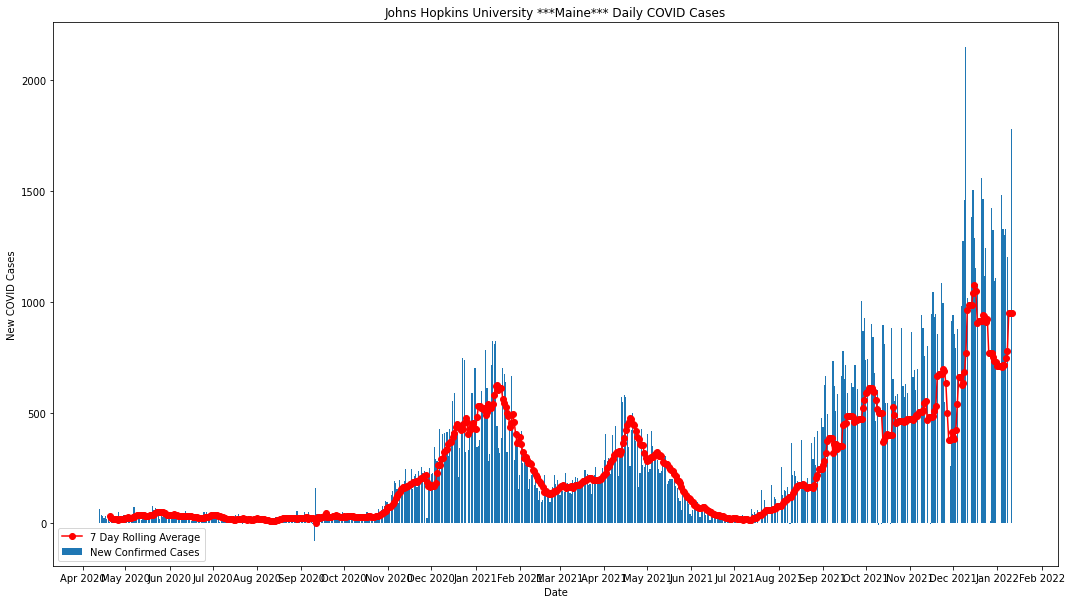

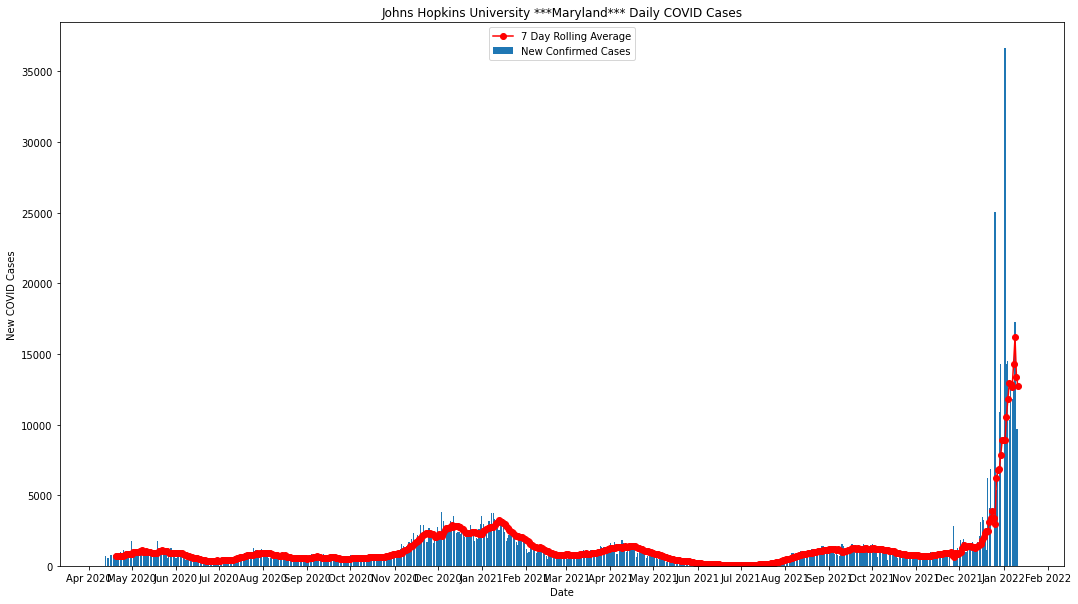

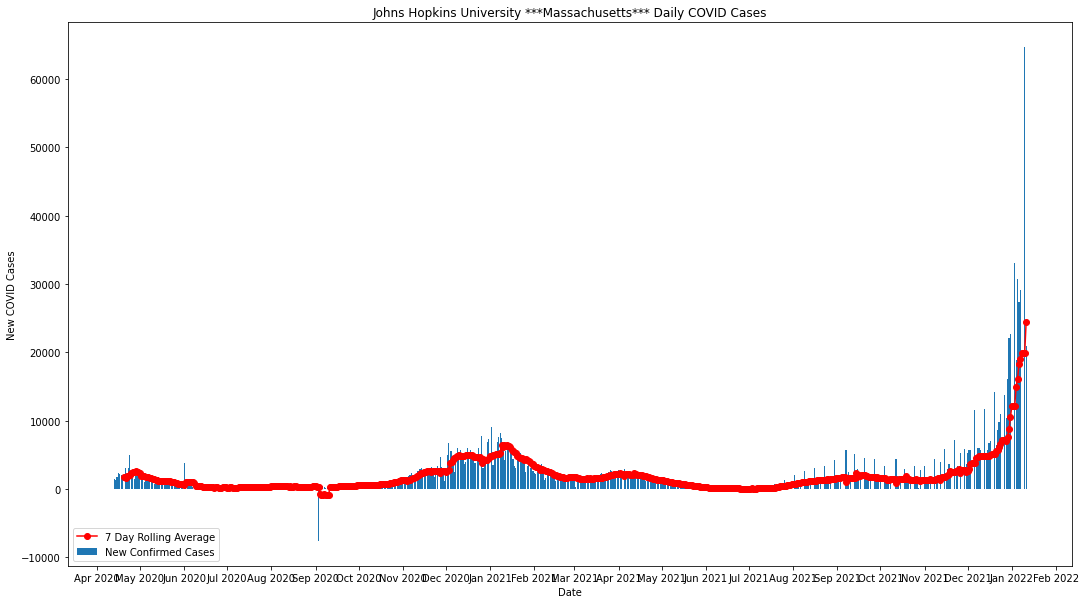

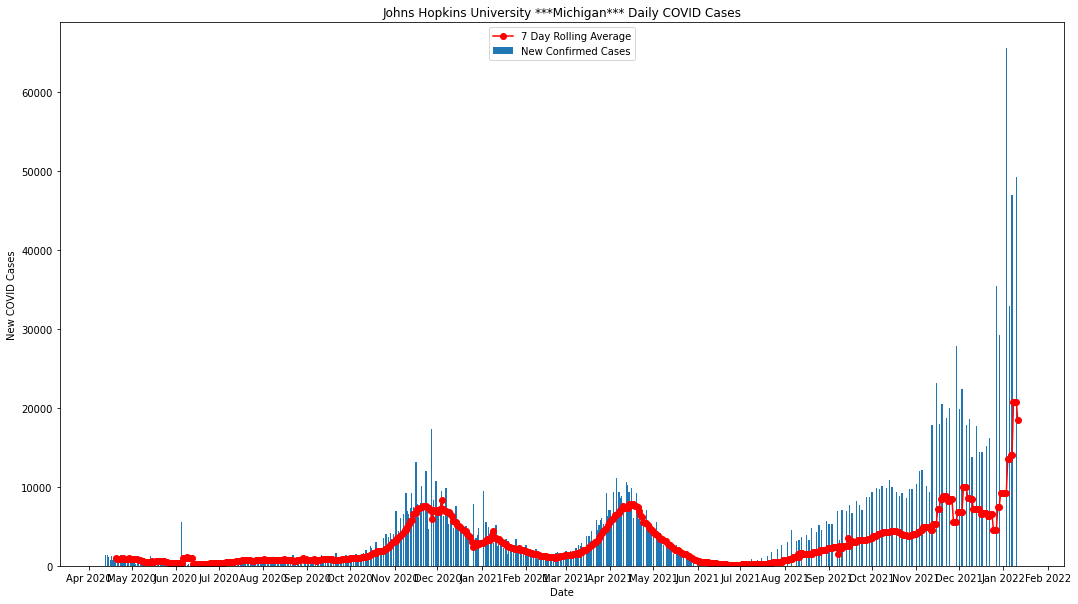

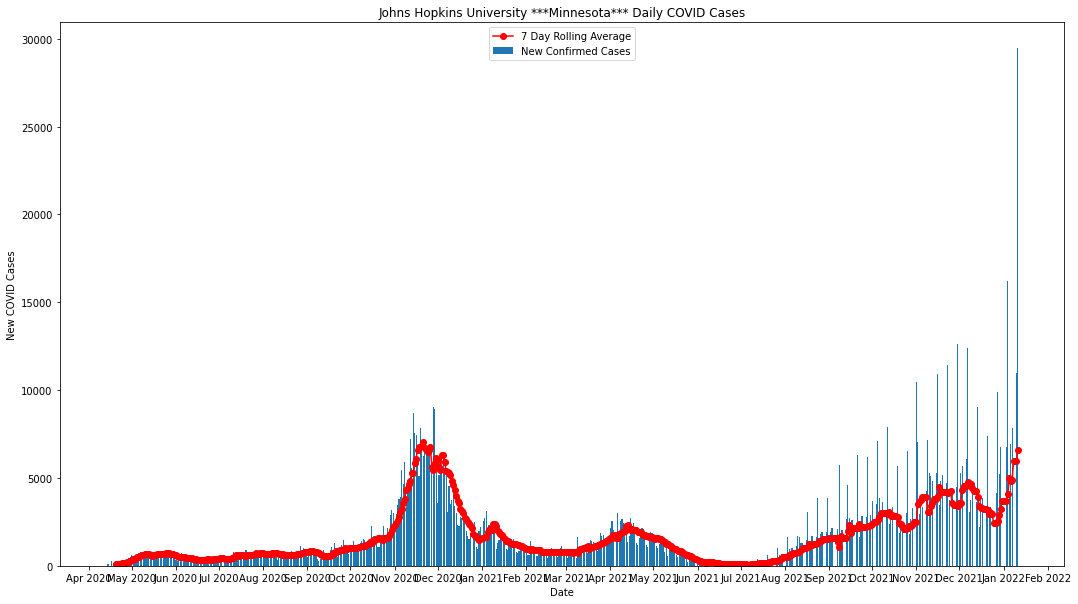

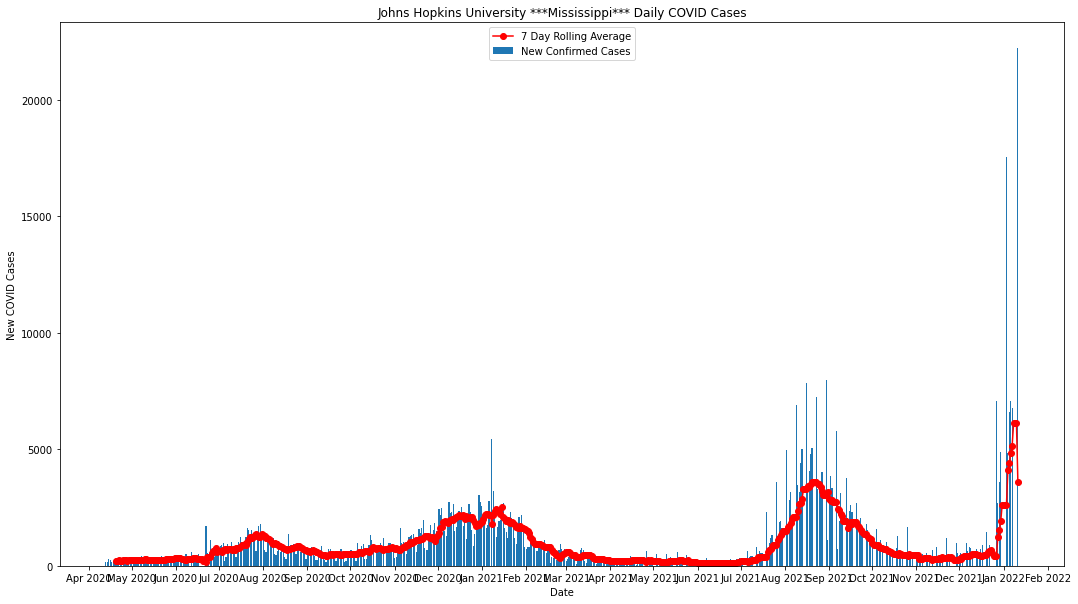

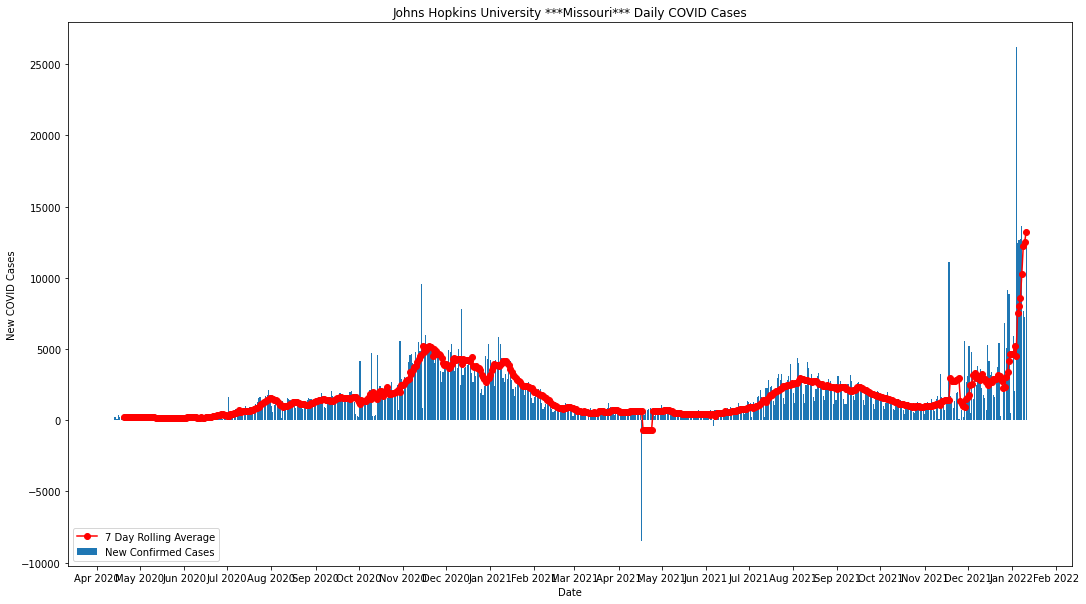

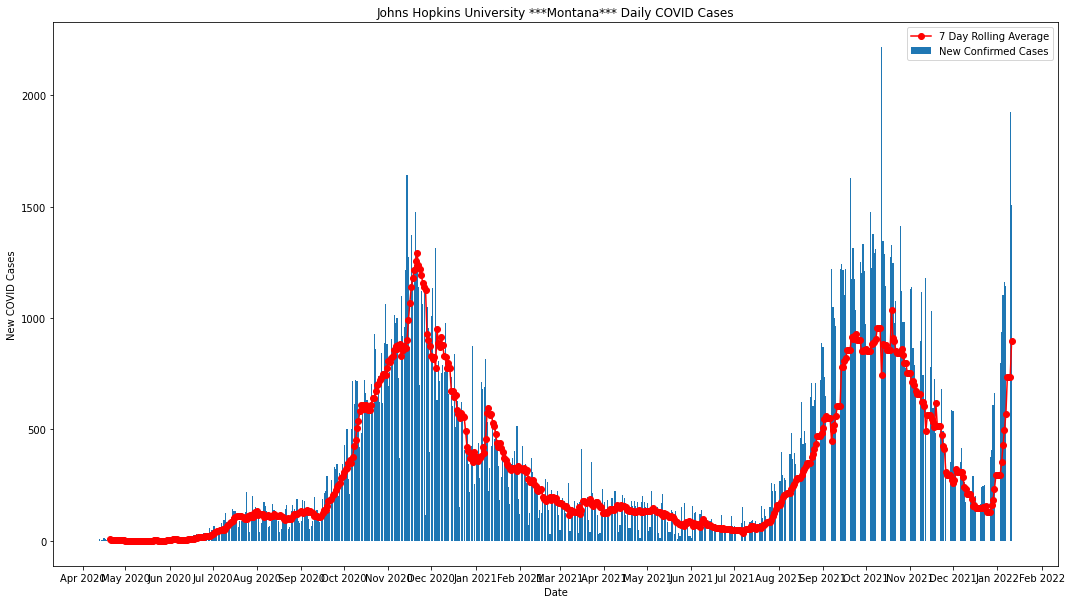

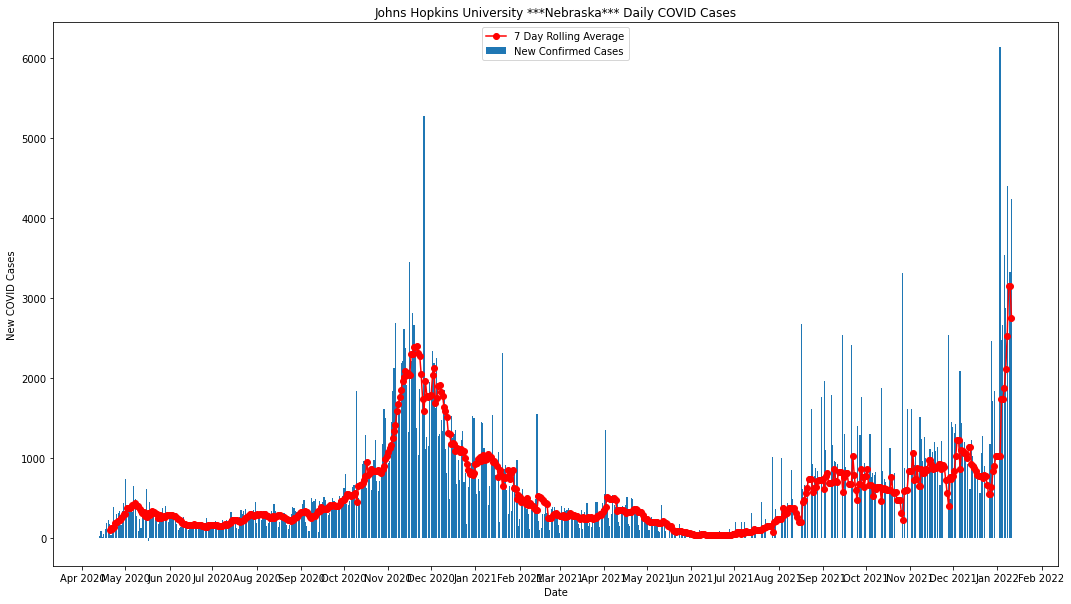

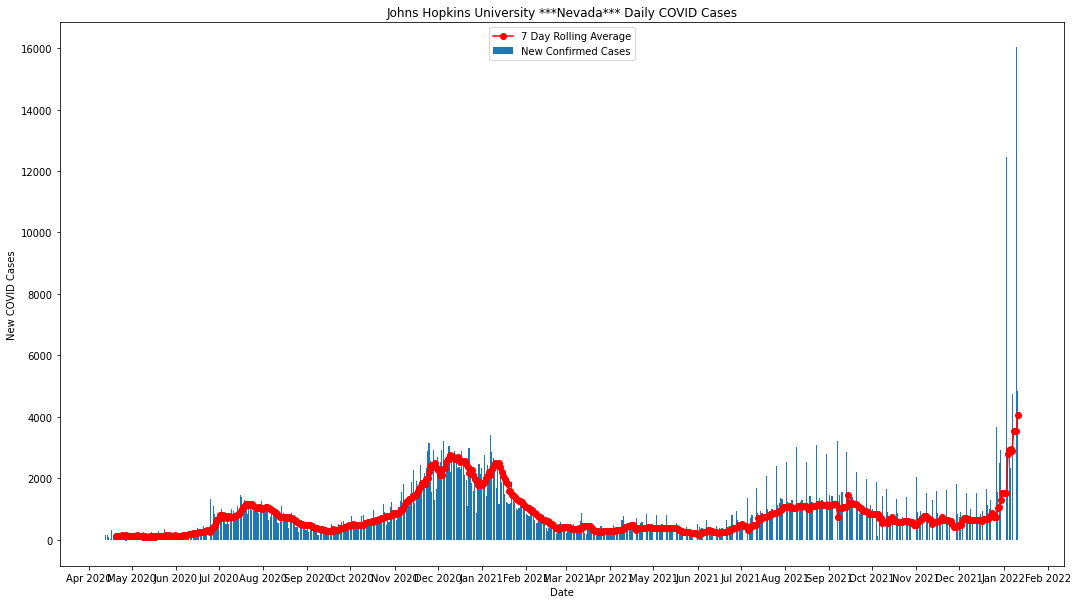

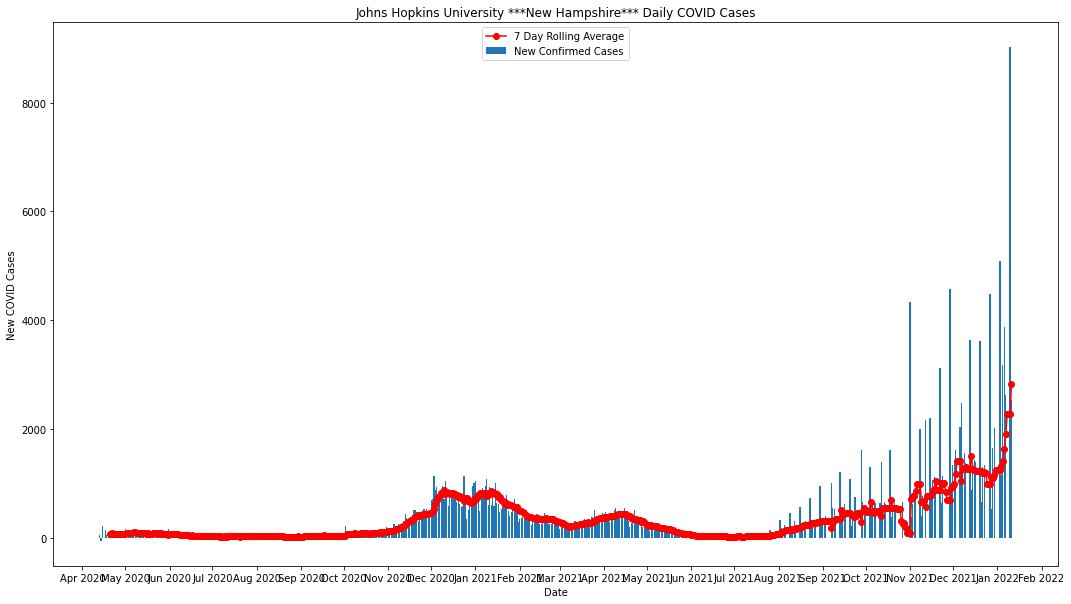

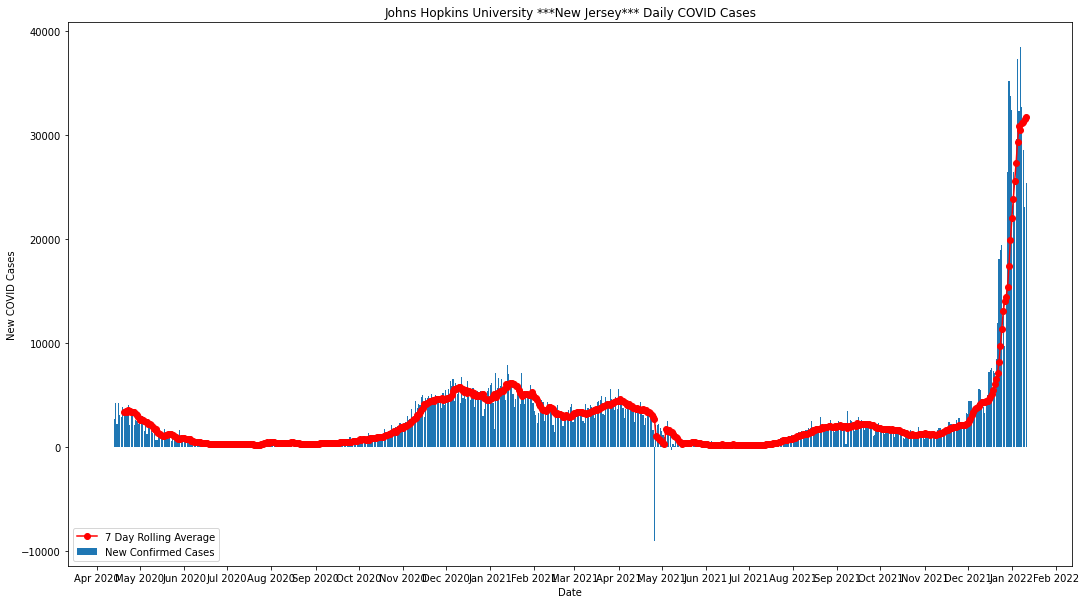

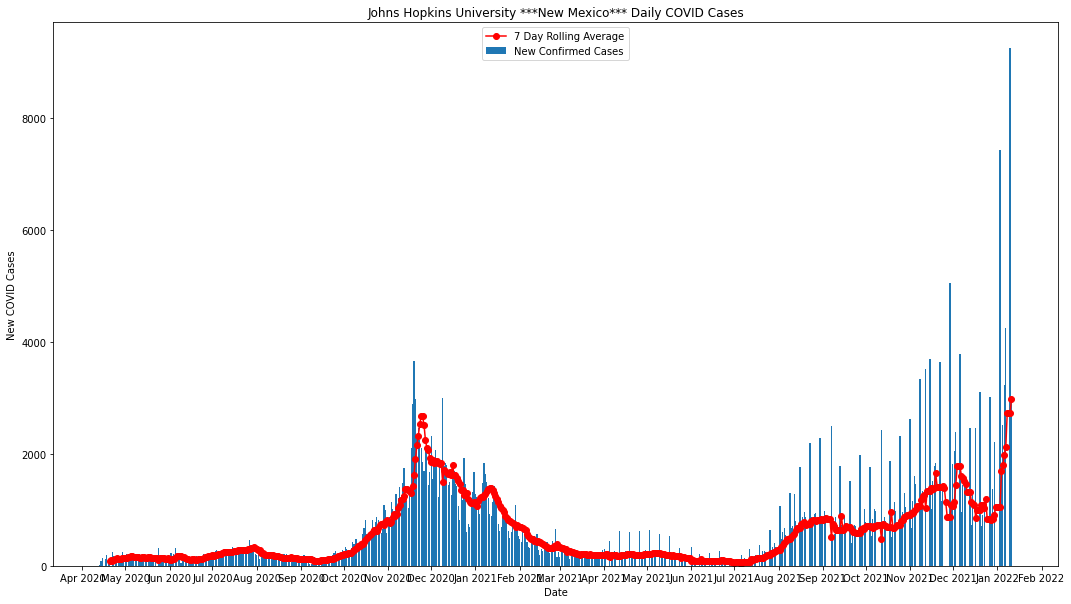

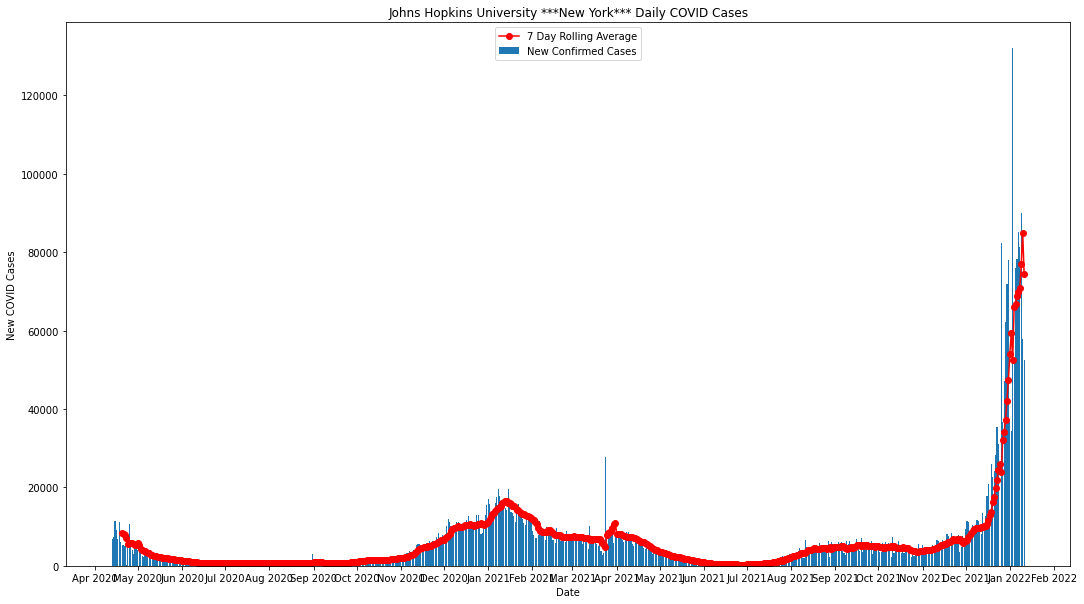

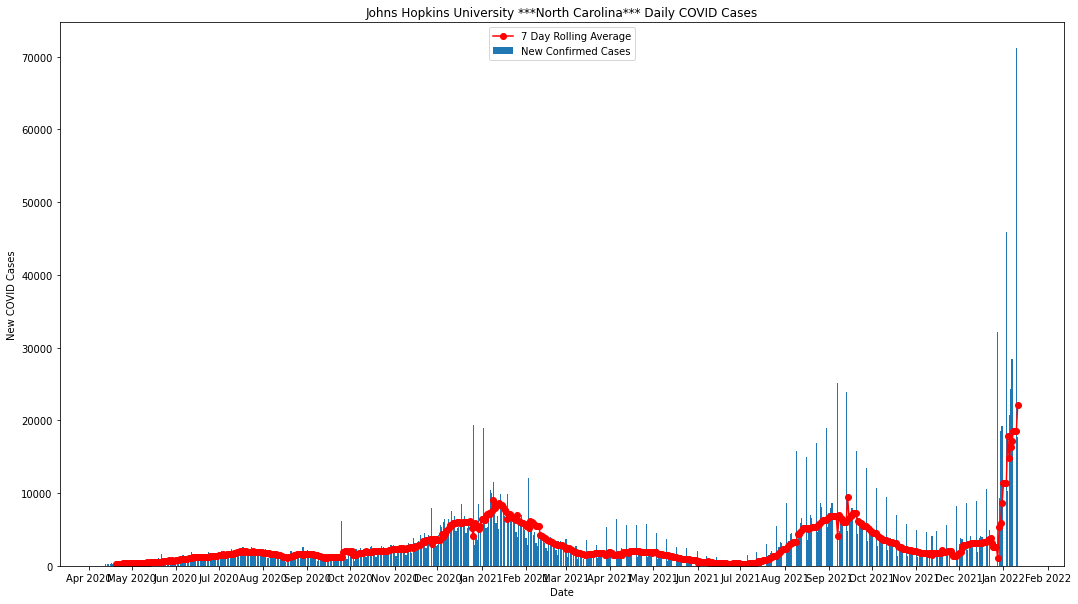

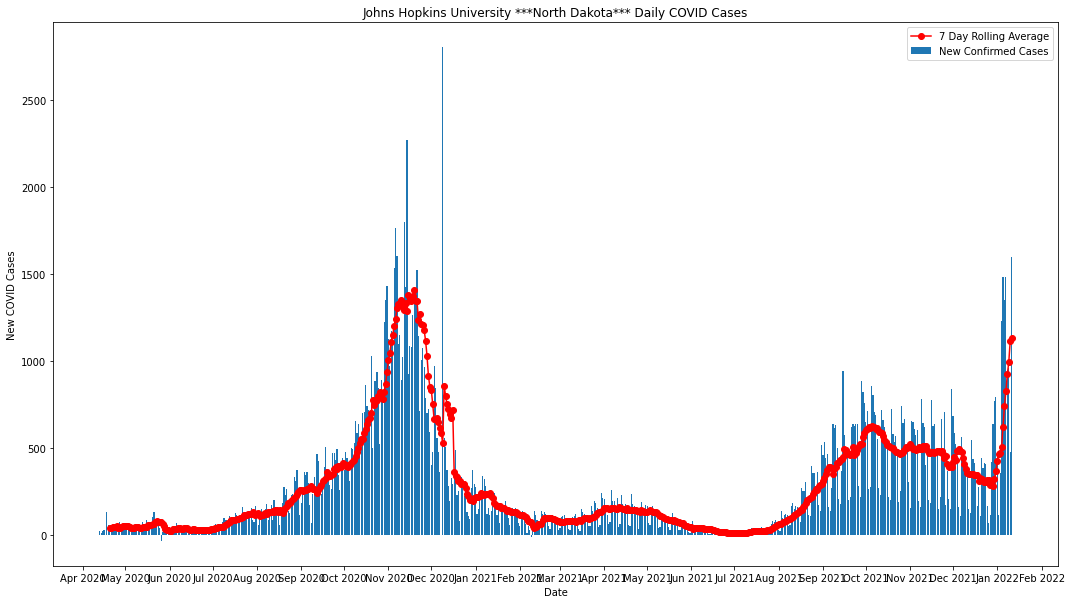

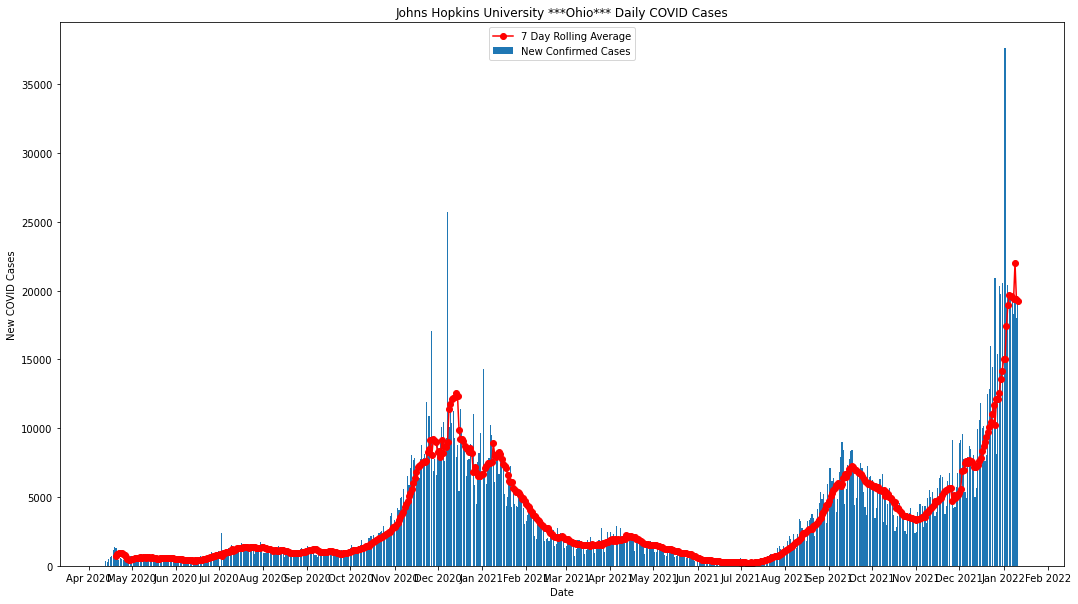

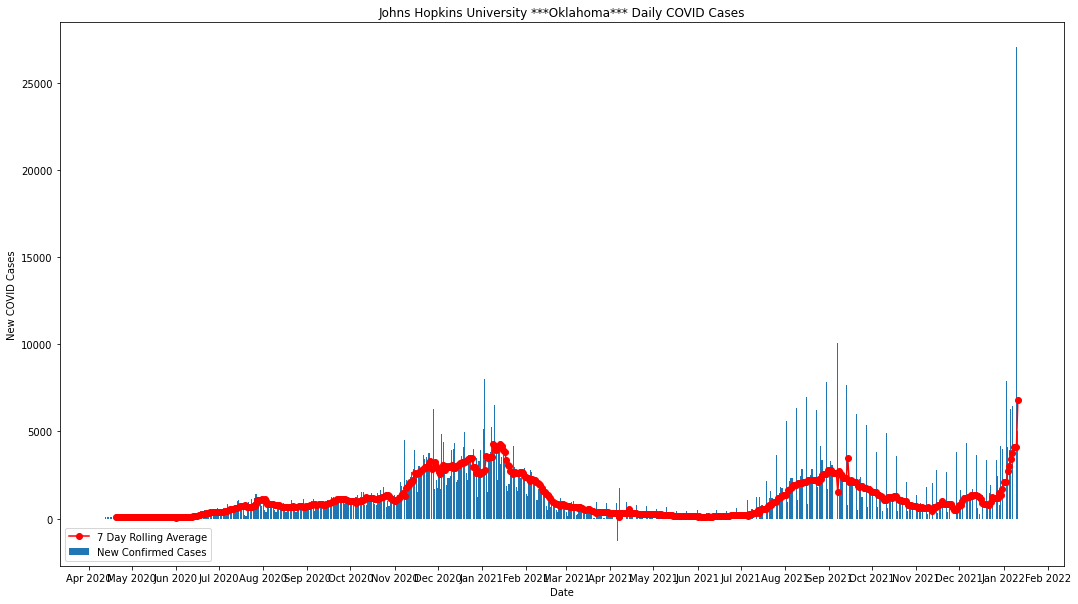

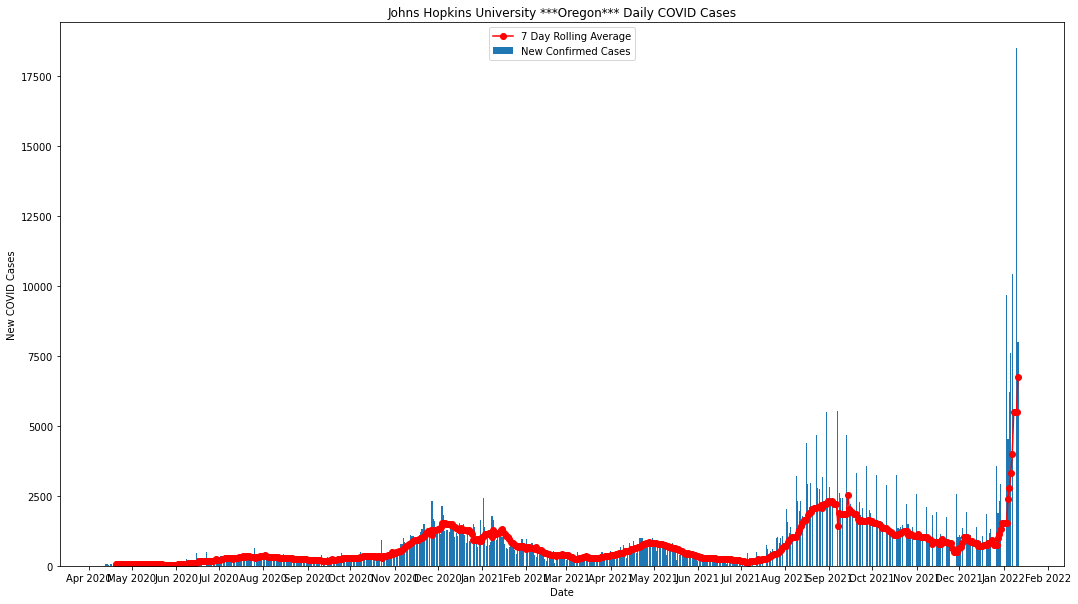

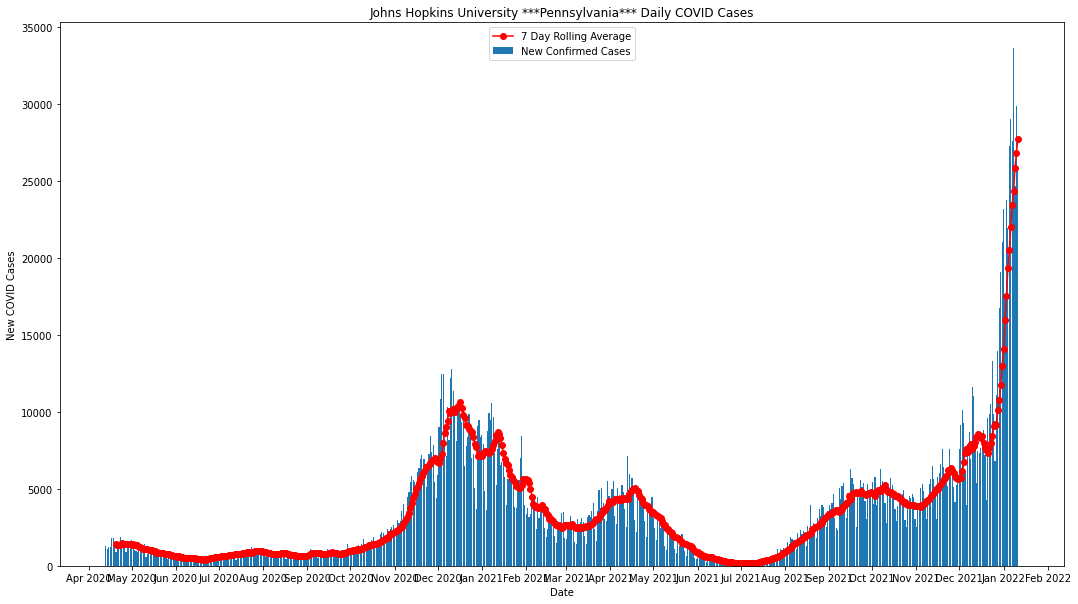

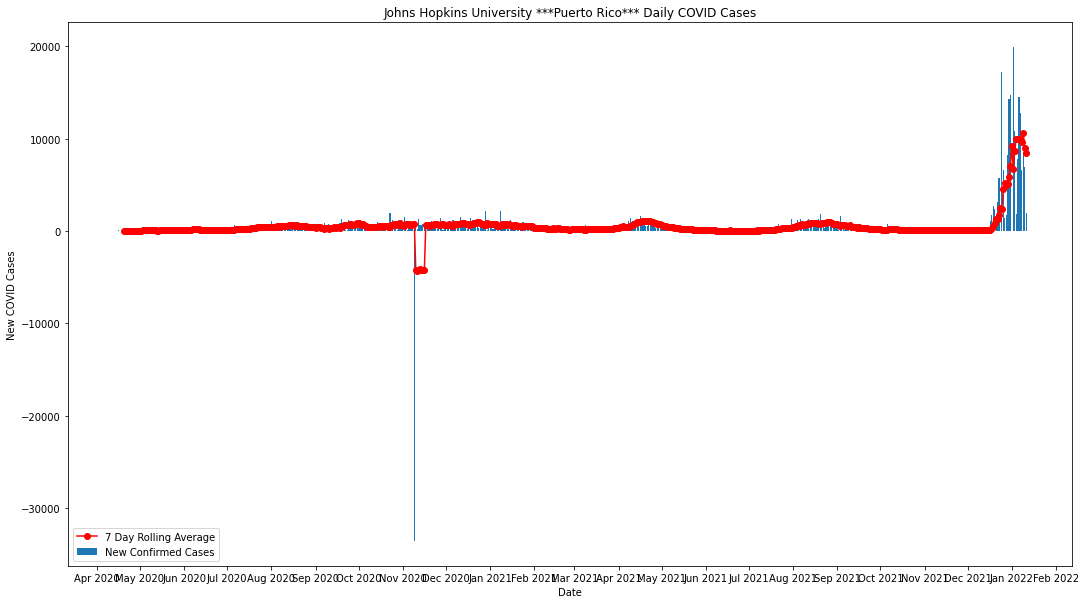

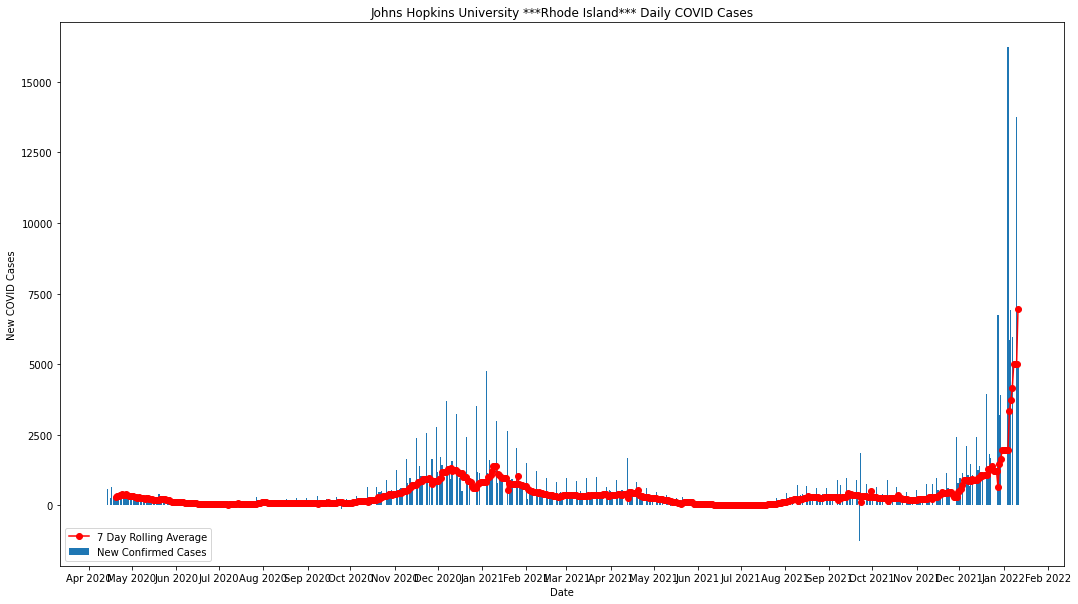

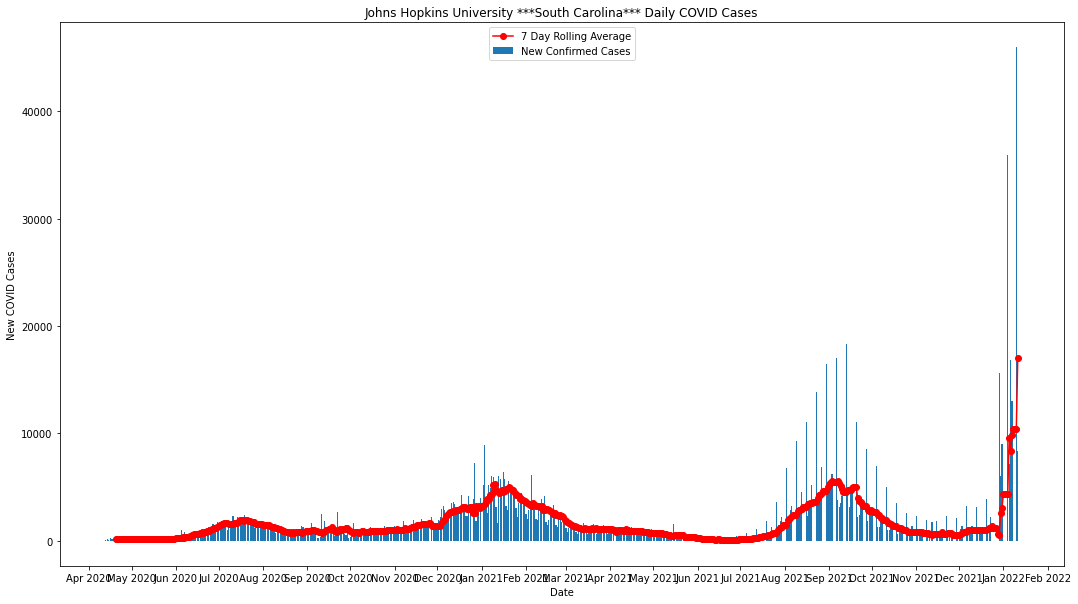

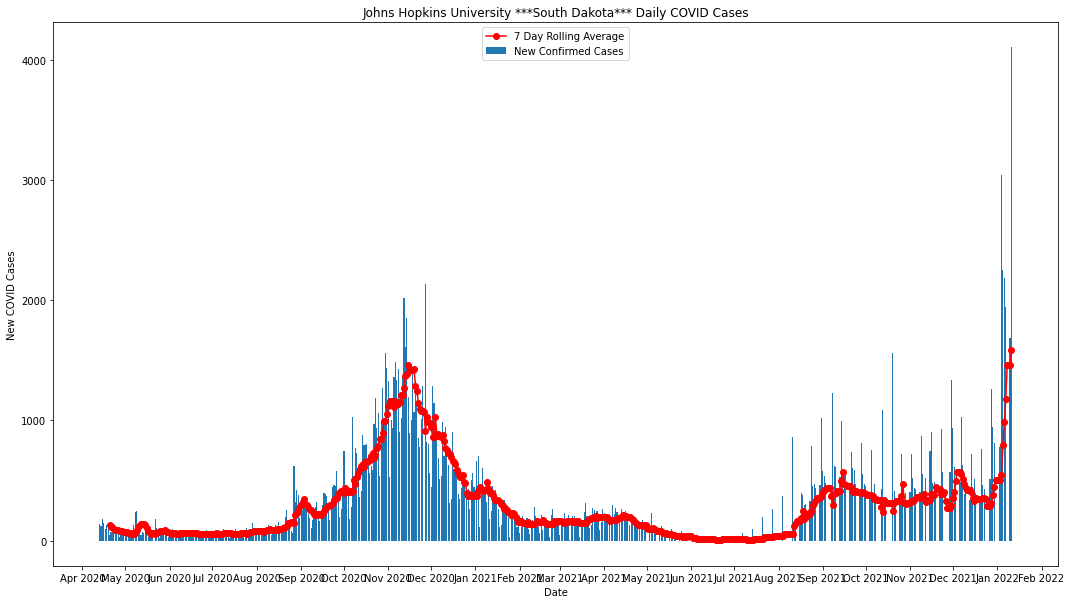

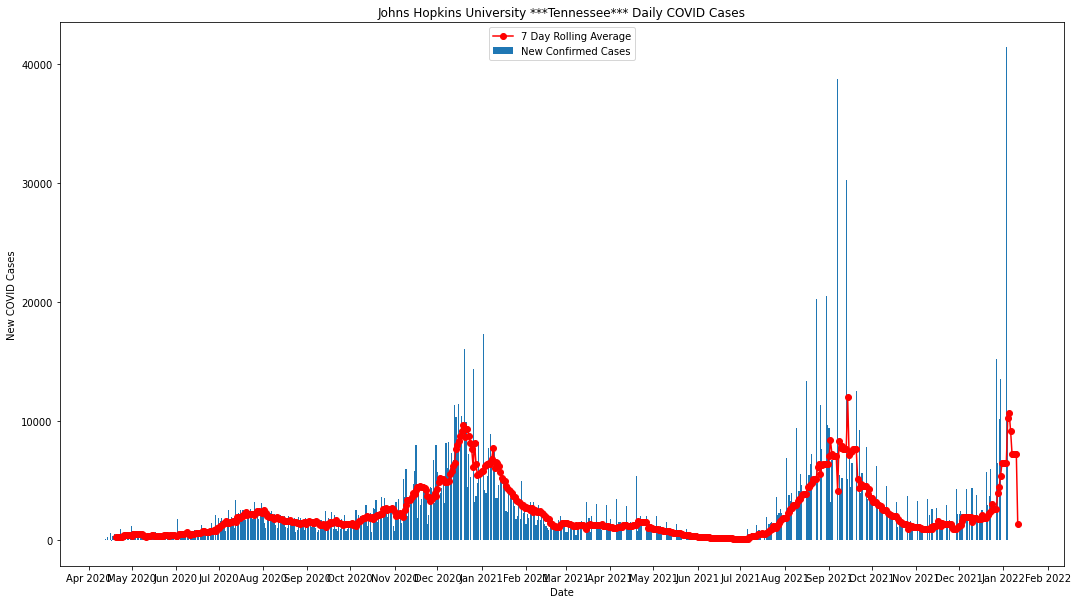

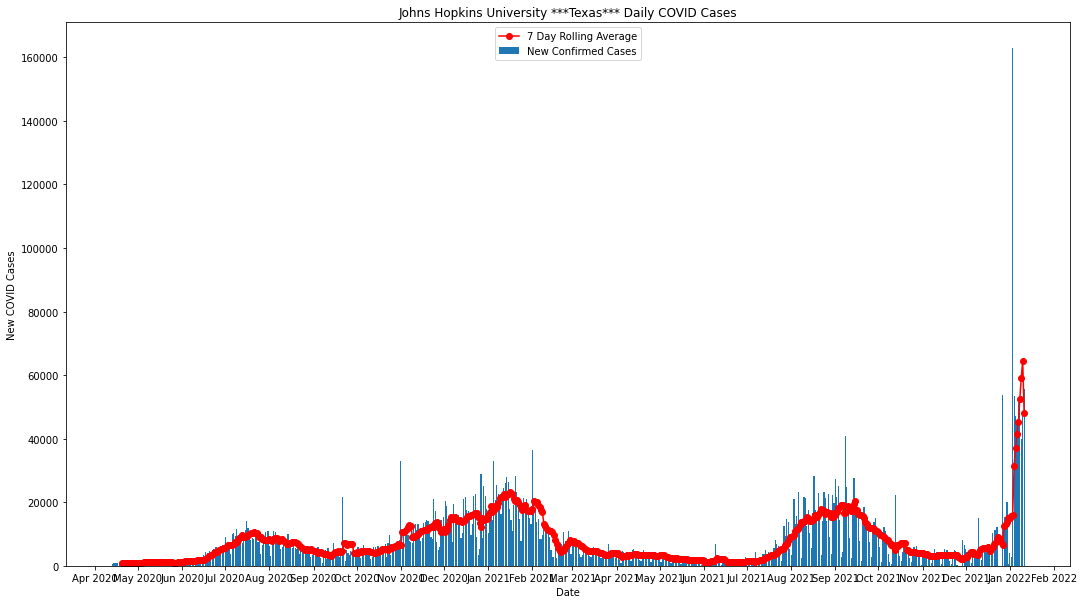

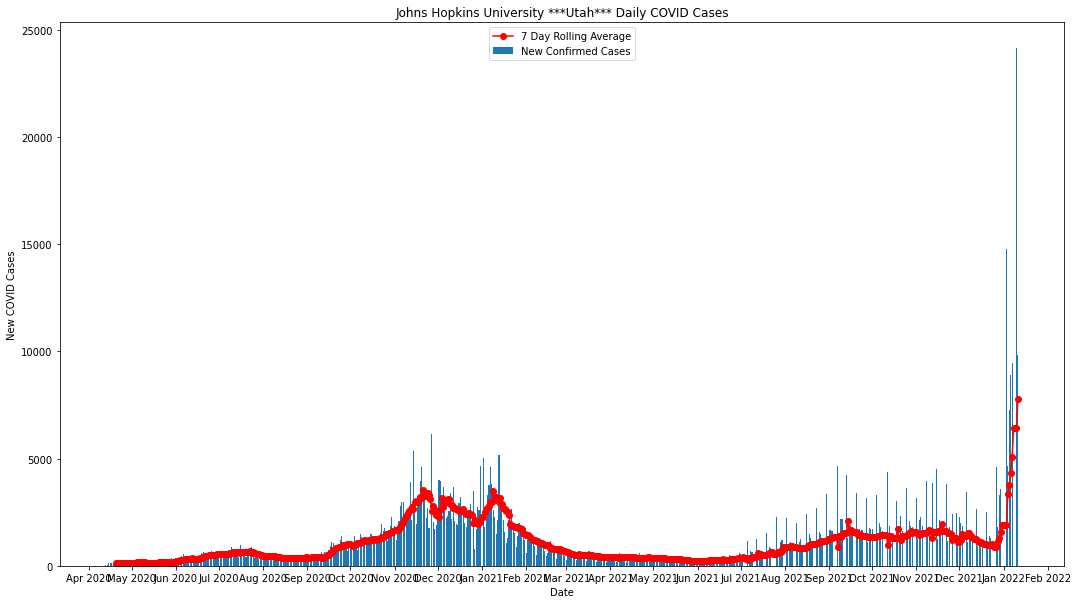

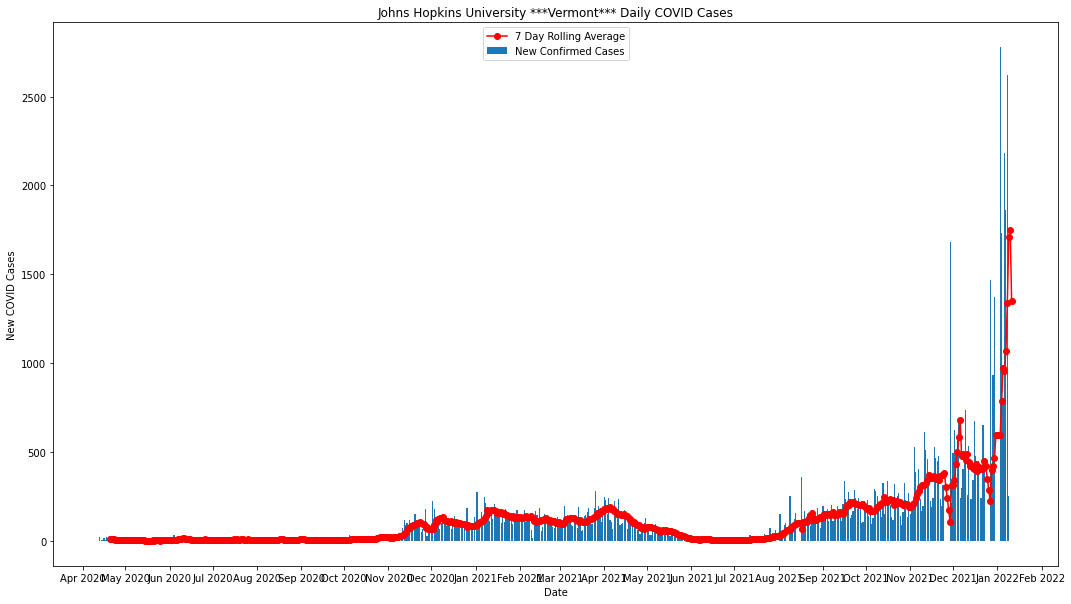

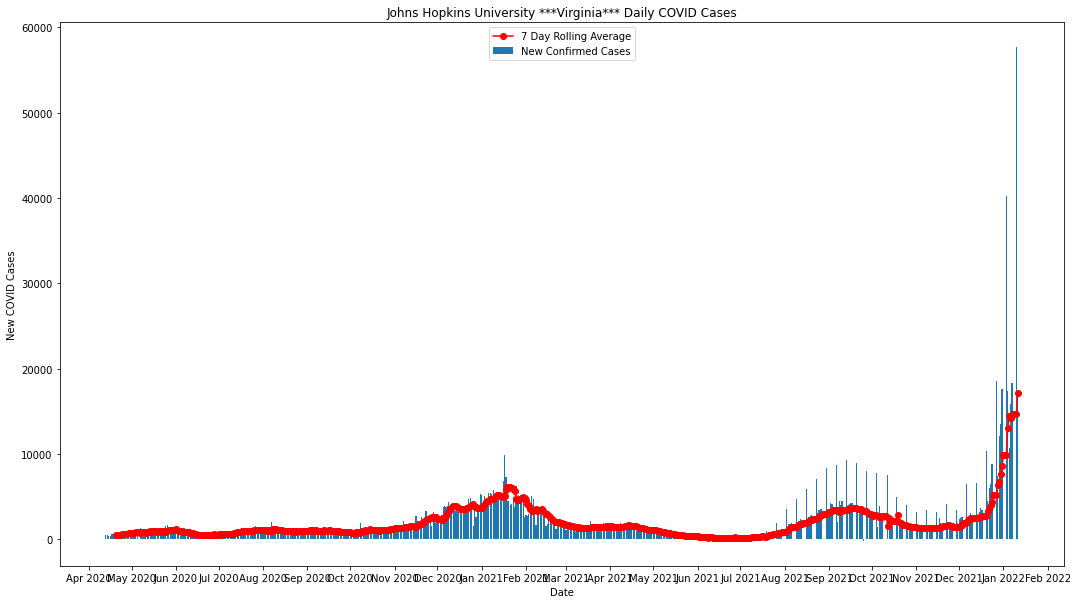

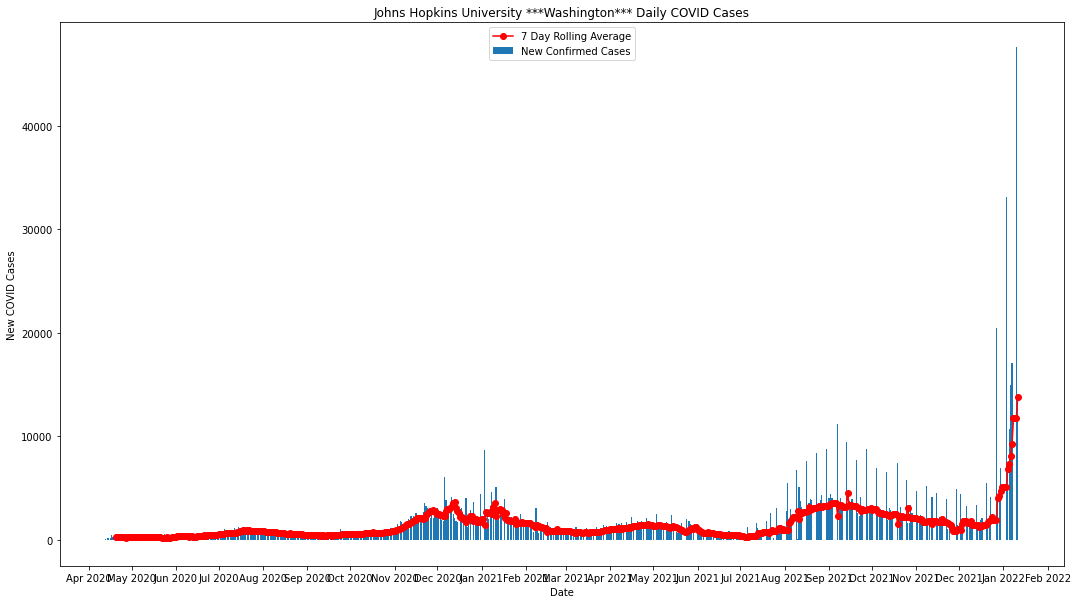

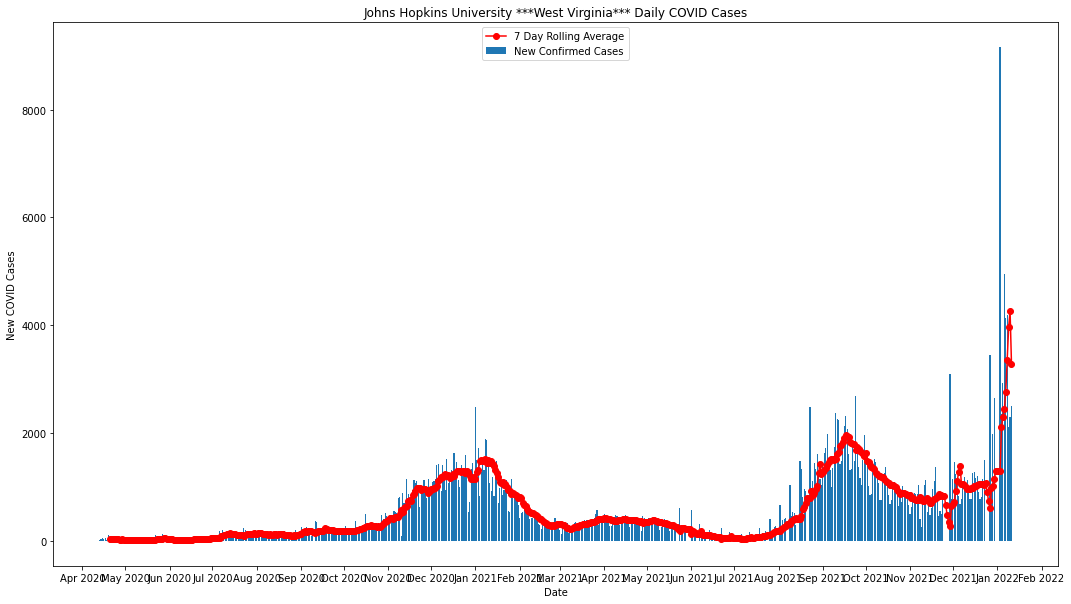

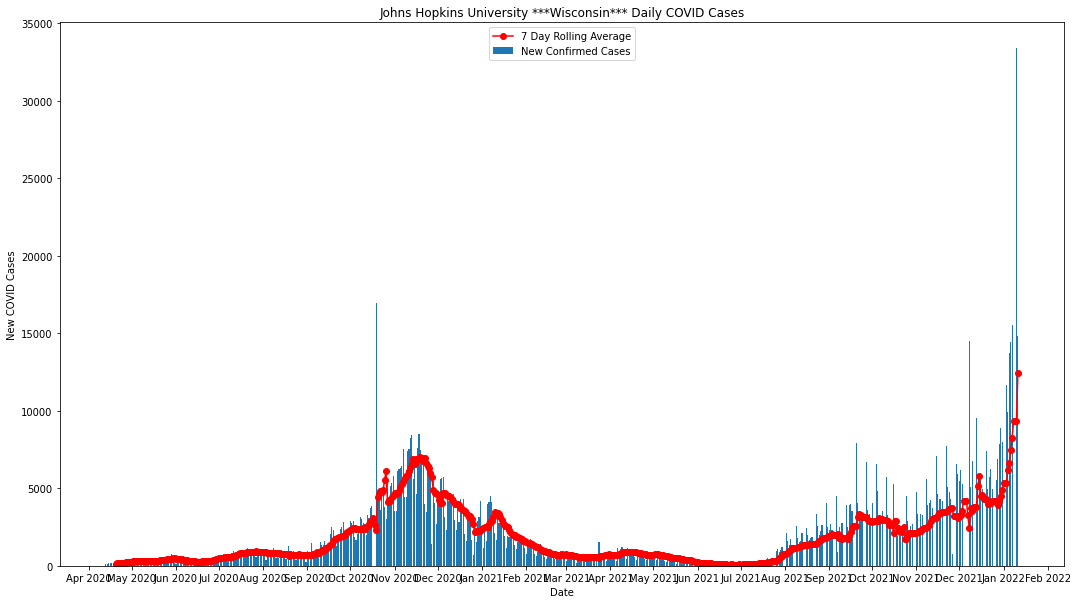

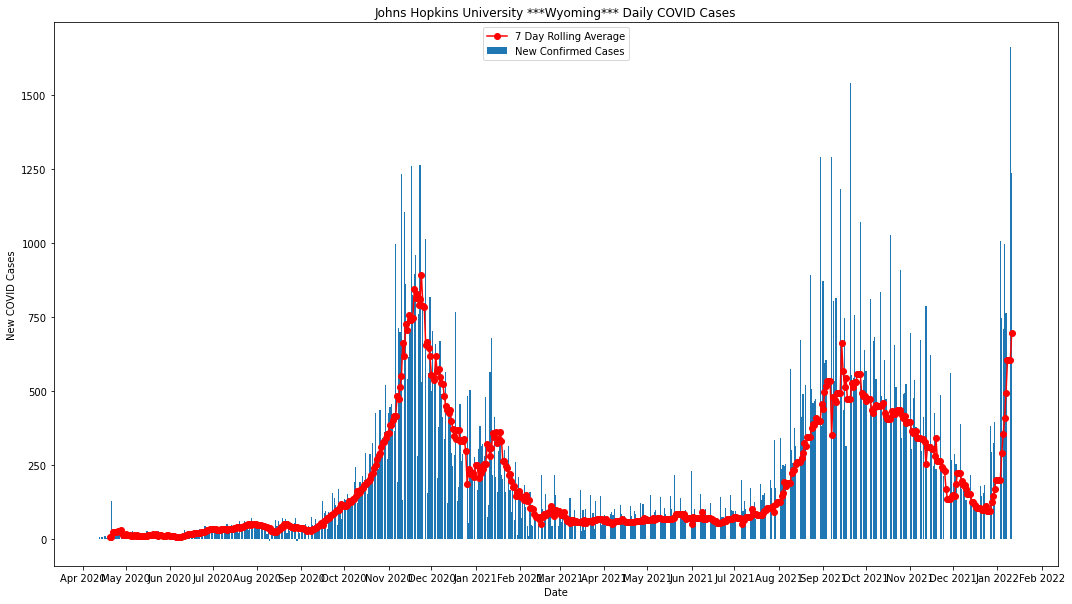

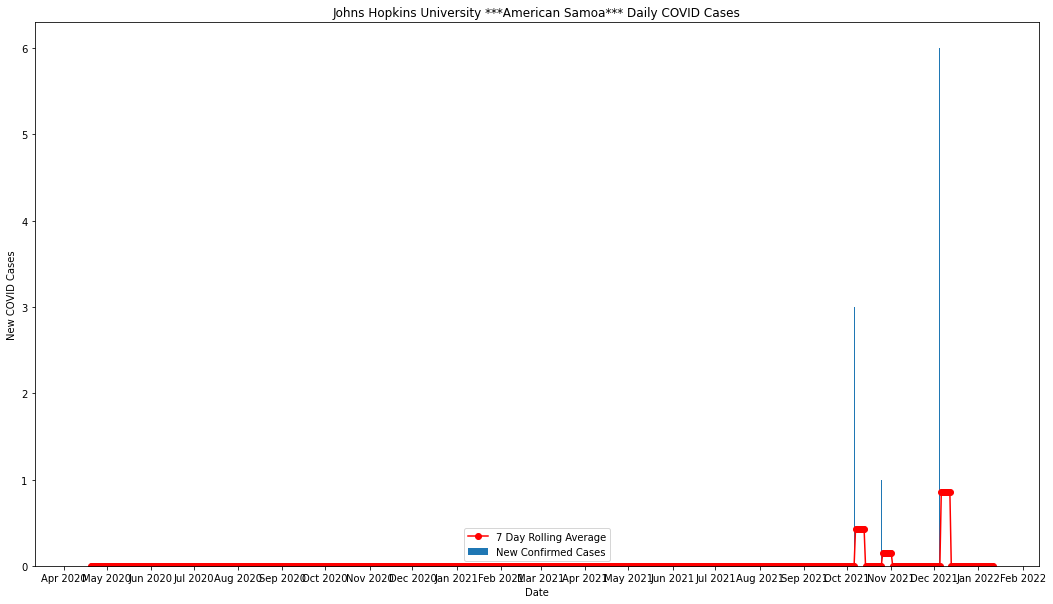

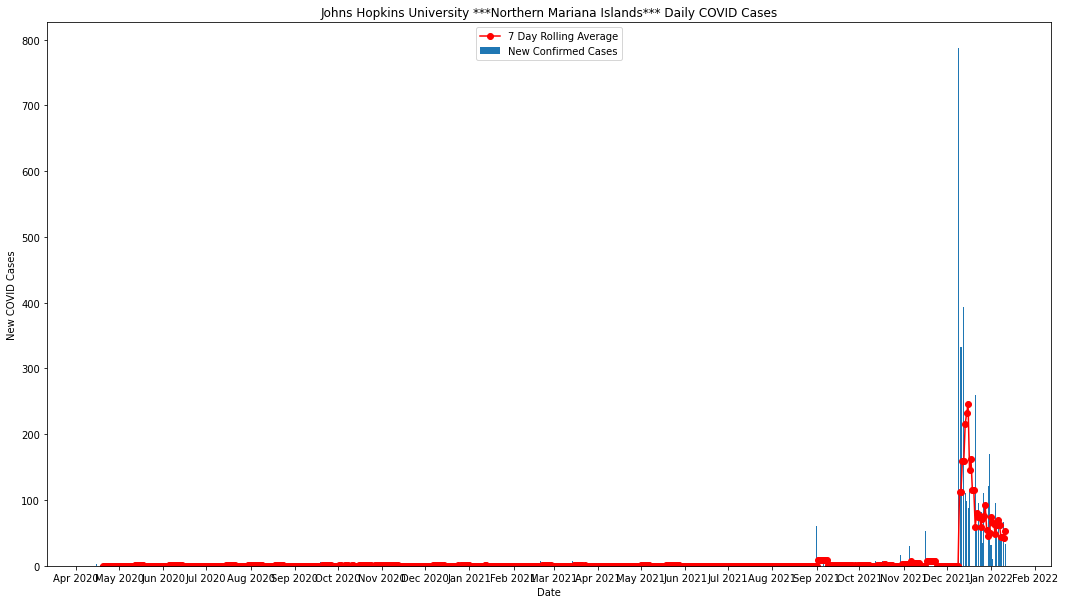

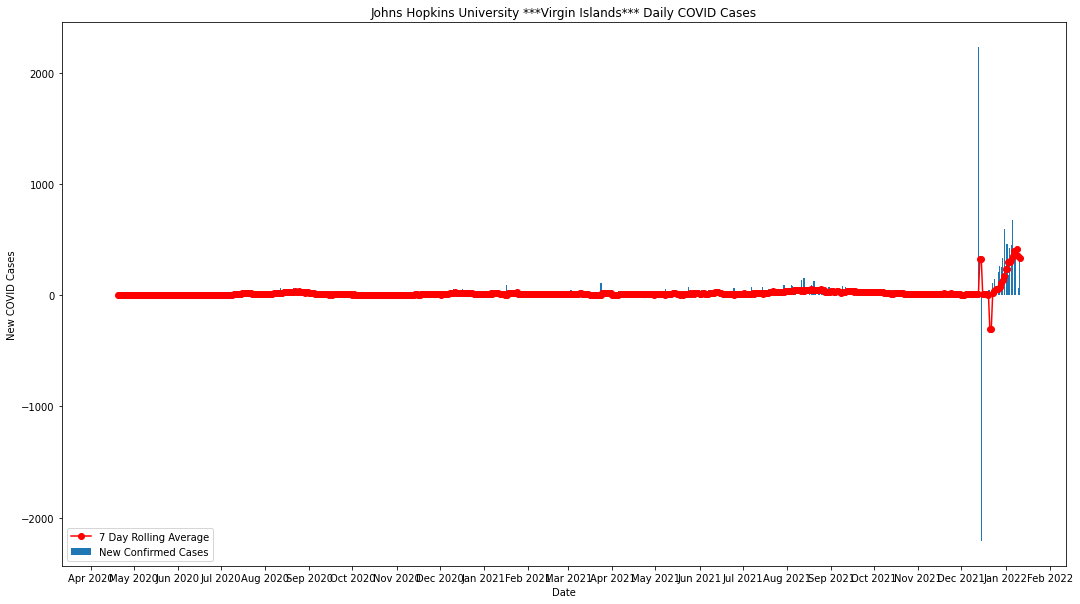

In [13]:
for x in State_list:
    return_confirmed = process_state_confirmed(x)
    chart_daily_confirmed(return_confirmed[0],return_confirmed[1],return_confirmed[2])

Massachusetts


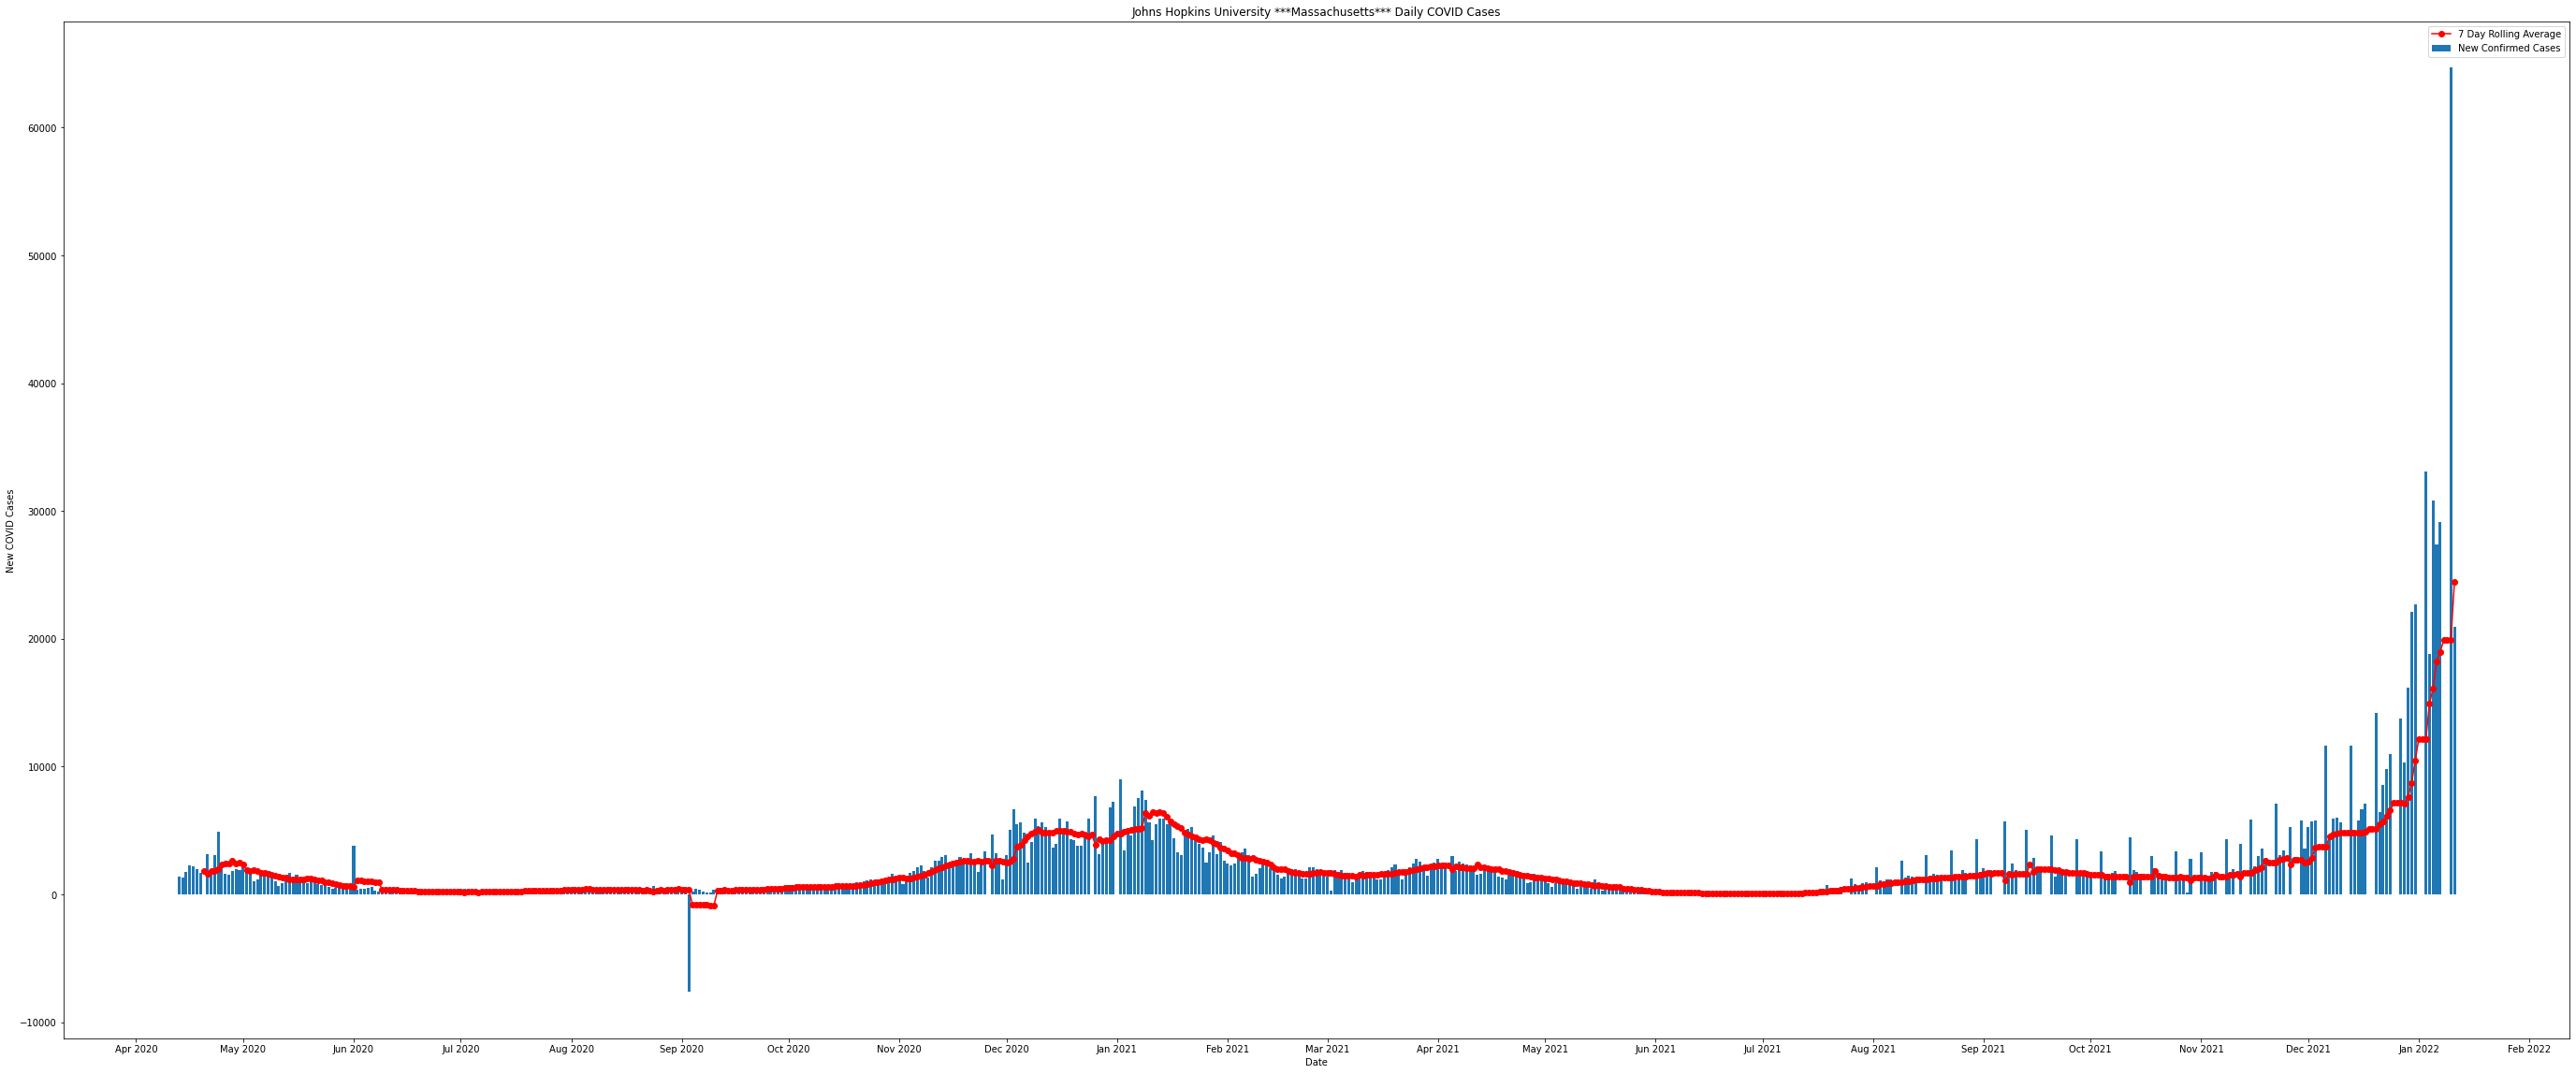

In [46]:
focus_list = ['Massachusetts']
for x in focus_list:
    return_confirmed = process_state_confirmed(x)
    chart_daily_confirmed(return_confirmed[0],return_confirmed[1],return_confirmed[2])

In [14]:
dir()

['In',
 'Out',
 'State_list',
 '_',
 '_10',
 '_2',
 '_7',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_exit_code',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'chart_daily_confirmed',
 'date',
 'date_list',
 'date_value',
 'datetime',
 'df_jhu_us_dict',
 'dt_date_list',
 'exit',
 'get_ipython',
 'mdates',
 'np',
 'pd',
 'plt',
 'process_state_confirmed',
 'quit',
 'return_confirmed',
 'timedelta',
 'x',
 'yesterday']

In [15]:
State_list


['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Guam',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming',
 'American Samoa',
 'Northern Mariana Islands',
 'Virgin Islands']

In [41]:
def find_max_case_date_by_state(passed_state):
    print(passed_state)
    aaa = df_jhu_us_dict[date_list[0]].loc[df_jhu_us_dict[date_list[0]].Province_State == passed_state]
    print(aaa)
    for d_value in date_list[1:]:
        aaa = aaa.append(df_jhu_us_dict[d_value].loc[df_jhu_us_dict[d_value].Province_State == passed_state])
    bbb = aaa.loc[:,['dt_date','Confirmed']]
    ccc = bbb.set_index('dt_date')
    ddd = ccc.diff(periods = 1)
    print(ddd)

In [42]:
xxx = find_hightest_case_date_by_state('Texas')

Texas


In [43]:
aaa = df_jhu_us_dict[date_list[0]].loc[df_jhu_us_dict[date_list[0]].Province_State == 'Texas']

In [44]:
aaa

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,dt_date
47,Texas,US,2020-04-12 23:18:15,31.0545,-97.5635,13780,306,2014.0,11460.0,48.0,47.523991,124533.0,1338.0,2.22061,84000048,USA,541.811523,9.782847,2020-04-12


In [27]:
df_jhu_us_dict[date_list[-1]].loc[df_jhu_us_dict[date_list[-1]].Province_State == 'Texas']

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,dt_date
49,Texas,US,2022-01-12 04:32:31,31.0545,-97.5635,5143345,76643,NaN,NaN,48.0,17738.191849,40446467.0,NaN,1.490139,84000048.0,USA,139490.388307,NaN,2022-01-11


In [33]:
aaa = df_jhu_us_dict[date_list[0]].loc[df_jhu_us_dict[date_list[0]].Province_State == 'Texas']
for d_value in date_list[1:]:
    aaa = aaa.append(df_jhu_us_dict[d_value].loc[df_jhu_us_dict[d_value].Province_State == 'Texas'])
bbb = aaa.loc[:,['dt_date','Confirmed']]
ccc = bbb.set_index('dt_date')
ddd = ccc.diff(periods = 1)

In [34]:
ddd


,Confirmed
dt_date,
2020-04-12,NaN
2020-04-13,548.0
2020-04-14,760.0
2020-04-15,956.0
2020-04-16,941.0
...,...
2022-01-07,52571.0
2022-01-08,49690.0
2022-01-09,39982.0


In [37]:
ddd[ddd.Confirmed == ddd.Confirmed.max()]

,Confirmed
dt_date,
2022-01-03,162871.0
